The Loan Default Prediction project aims to leverage data science techniques to assess the likelihood of borrowers defaulting on loans. This project involves building predictive models that use historical loan data to identify patterns and factors that contribute to defaults. The goal is to create a tool that can help financial institutions make informed decisions about lending by accurately predicting the risk of default for new loan applicants.


1- Preprocessing:


-  Clean and preprocess the data by handling missing values, removing outliers, and encoding categorical variables.

2- Exploratory Data Analysis (EDA):

- Perform EDA to uncover insights, relationships, and trends in the data.

- Visualize key features that might influence loan defaults, such as income levels, loan amount, interest rates, and repayment terms.

3- Feature Engineering:

- Creating new features or transform existing ones to improve the model's predictive power.

- Examples include debt-to-income ratios, loan-to-value ratios, and payment histories.

4- Model Building and Evaluation:

- Develop various machine learning models, such as logistic regression, decision trees, random forests, gradient boosting, and neural networks.

- Evaluate models using metrics like accuracy, precision, recall, F1-score, and AUC-ROC curve.

5- Model Deployment:

- Integrate the best-performing model into a user-friendly interface for financial analysts and decision-makers.
Provide clear interpretations of the model’s predictions and the factors driving them.

In [1]:
 # Import the required libraries
import math
import numpy as np
import pandas as pd
import seaborn as sns
import colorsys
import missingno as msno
import itertools
import matplotlib.pyplot as plt
import matplotlib.style as style
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report,ConfusionMatrixDisplay
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

# setting up plot style
#style.use('seaborn-poster')
#style.use('fivethirtyeight')

pd.set_option("display.max_columns", None)

In [2]:
app = pd.read_csv(r"D:/Banque misr intern/Use Cases/application_data.csv", na_values=['XNA', 'Unknown', 'UNKNOWN','Unknow'])

In [3]:
# Database dimension
app.shape

(307511, 122)

In [4]:
# Database column types
app.info(max_cols=122)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307507 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [5]:
# Checking the numeric variables of the dataframes
app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [6]:
# Check categorical vs. numerical variables
categorical_vars = [var for var in app.columns if app[var].dtype == 'object']
numerical_vars = [var for var in app.columns if app[var].dtype in ['int64', 'float64']]
print('Dataset contains', len(categorical_vars), 'Categorical Variables and', len(numerical_vars), 'Numerical Variables')

Dataset contains 16 Categorical Variables and 106 Numerical Variables


In [7]:
# Functions
def missing(df):
    msng_info = pd.DataFrame(df.isnull().sum().sort_values()).reset_index()
    msng_info.rename(columns={'index':'col_name',0:'null_count'},inplace=True)
    msng_info['msng_pct'] = msng_info['null_count']/df.shape[0]*100
    return msng_info

def plot_missing_location(df):
    plt.figure(figsize=(10,7))
    plt.title('Missing Location')
    sns.heatmap(df.isnull(), cmap= 'Blues')
    plt.show()

# Create a function for analysin new missing values to avoid repitition as we'll do this 18 times :)
def analyze_missing_numerical(column):
    # Convert column to numeric type
    app[column] = pd.to_numeric(app[column], errors='coerce')

    print(f"Missing values in {column}:")
    print(app[column].isnull().sum())
    print(f"Percentage of missing values in {column}:")
    print(app[column].isnull().mean())
    print(f"Descriptive statistics for {column}:")
    print(app[column].describe())

    # calculate mean,median to choose suitable imputation for every round
    print(f"Mean Value for {column}:")
    print(app[column].describe().mean())
    print(f"Median Value for {column}:")
    print(app[column].describe().median())

def analyze_missing_categorical(column):
    # Count the number/mean of missing values
    missing_count = app[column].isnull().sum()
    missing_proportion = app[column].isnull().mean()

    print(f"Missing Count for {column}: {missing_count}")
    print(f"Missing Proportion for {column}: {missing_proportion}")

    # Count the frequency
    value_counts = app[column].value_counts(dropna=False)
    print(f"Value Counts for {column}:")
    print(value_counts)

def extract_col_starts_with(data, the_string):
  columns = []
  for col in data.columns:
      if col.startswith(the_string):
          columns.append(col)
  return columns


def Multi_hist_ploting(data, columns):

  n_cols = 4  # Number of columns in the grid
  n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate the required number of rows

  plt.figure(figsize=(10, 3 * n_rows))

  # Plotting each column in a separate subplot
  for i, column in enumerate(columns):
      plt.subplot(n_rows, n_cols, i + 1)
      plt.hist(data[column], bins=30, color='skyblue', edgecolor='black')
      plt.title(f'{column}', fontsize=8)
      plt.xlabel('Value', fontsize=10)
      plt.ylabel('Frequency', fontsize=10)
      plt.grid(False)
      plt.gca().spines['top'].set_visible(False)
      plt.gca().spines['right'].set_visible(False)

  plt.tight_layout()
  plt.show()


def map_organization_type(organization):
    if isinstance(organization, str):  # Check if the value is a string
        if ":" in organization and not "transport" in organization.lower():
            return "Industry_Trade"
        elif organization in ['Business Entity Type 1', 'Business Entity Type 2', 'Business Entity Type 3', 'Bank', 'Insurance']:
            return "Business_Finance"
        elif organization in ['Security', 'Security Ministries', 'Police', 'Military', 'Emergency', 'Government', 'Legal Services']:
            return "Civil_Legal_Services"
        elif organization in ['Kindergarten', 'School', 'University', 'Medicine']:
            return "Education_Healthcare"
        elif organization in ['Cleaning', 'Construction', 'Agriculture', 'Electricity', 'Services']:
            return "Goods_Producing_And_Services"
        elif organization in ['Transport: type 1', 'Transport: type 2', 'Transport: type 3', 'Transport: type 4', 'Hotel', 'Housing', 'Realtor', 'Restaurant', 'Culture']:
            return "Travel_Hospitality_Real_Estate"
        elif organization in ['Mobile', 'Postal', 'Telecom', 'Advertising']:
            return "Communication"
        elif organization in ['Other', 'XNA', 'Religion']:
            return "Miscellaneous"
        else:
            return organization
    else:
        return "Unknown"  # Or any other default value for non-string entries



## Working with Missing Values
### Visualize Miss Values

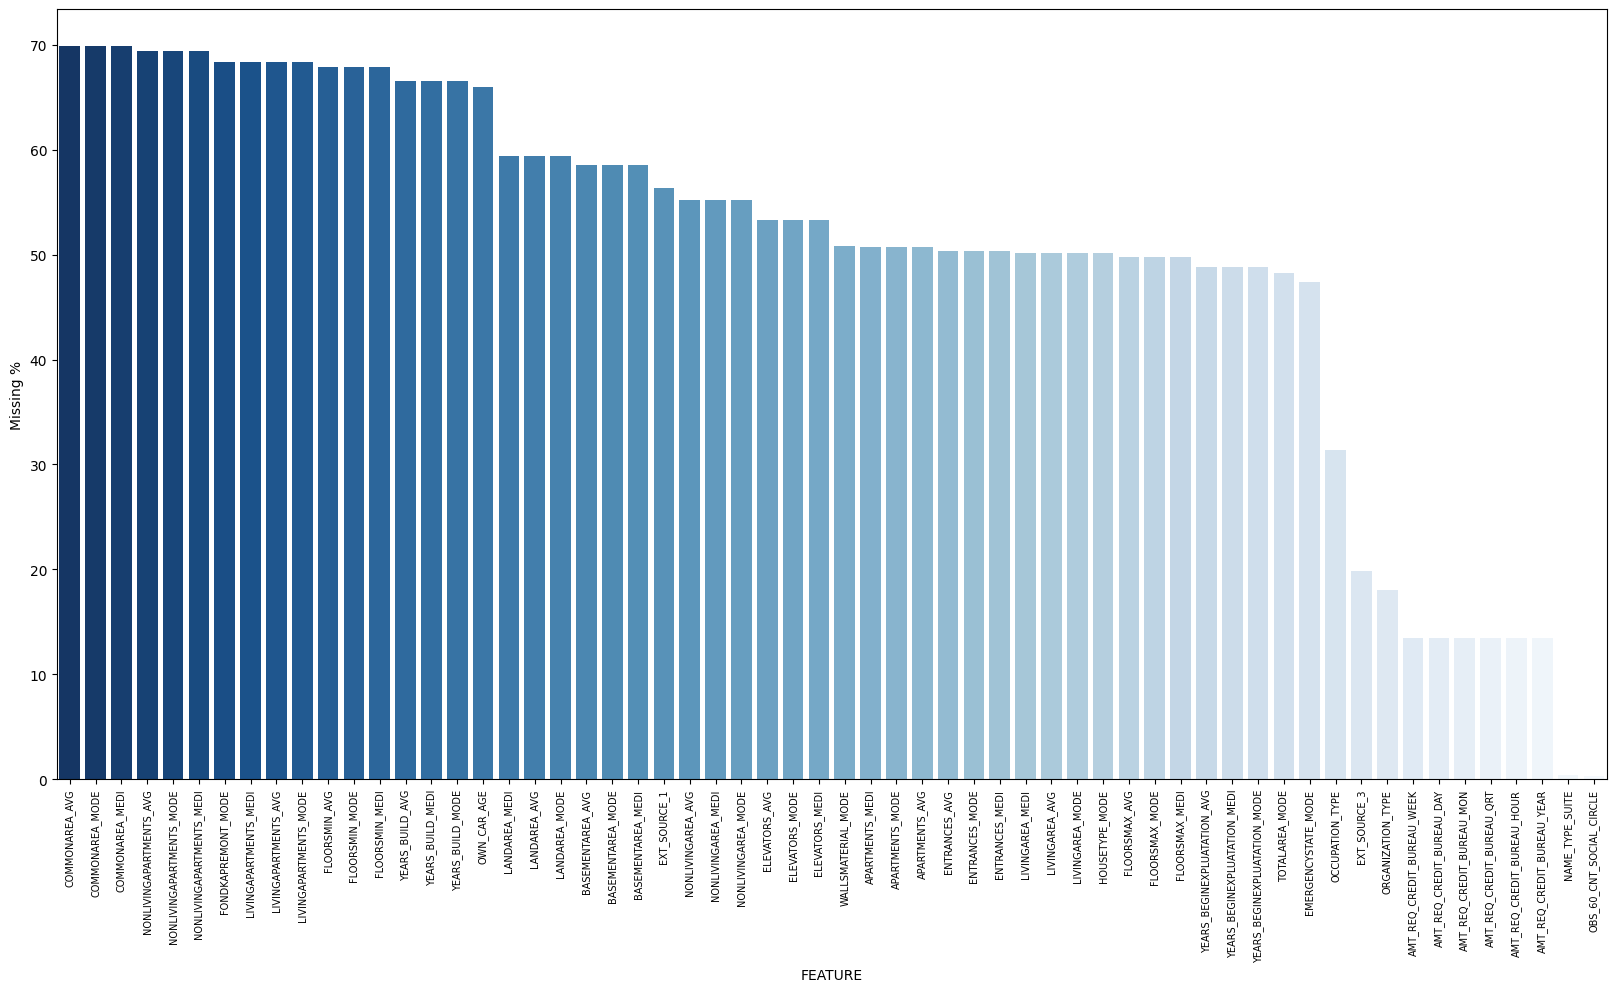

In [8]:
missing_data = app.isna().sum().sort_values(ascending=False)
missing_data = missing_data[missing_data>0]
missing_percentage = (100*missing_data/app.shape[0])
## Visualising missing data in the dataset

plt.figure(figsize=(20,10))
sns.barplot(x = missing_percentage.index[:60], y = missing_percentage.values[:60],palette='Blues_r')
plt.xticks(rotation =90,fontsize =7)
plt.xlabel("FEATURE",fontsize = 10)
plt.ylabel("Missing %",fontsize = 10)
plt.show()

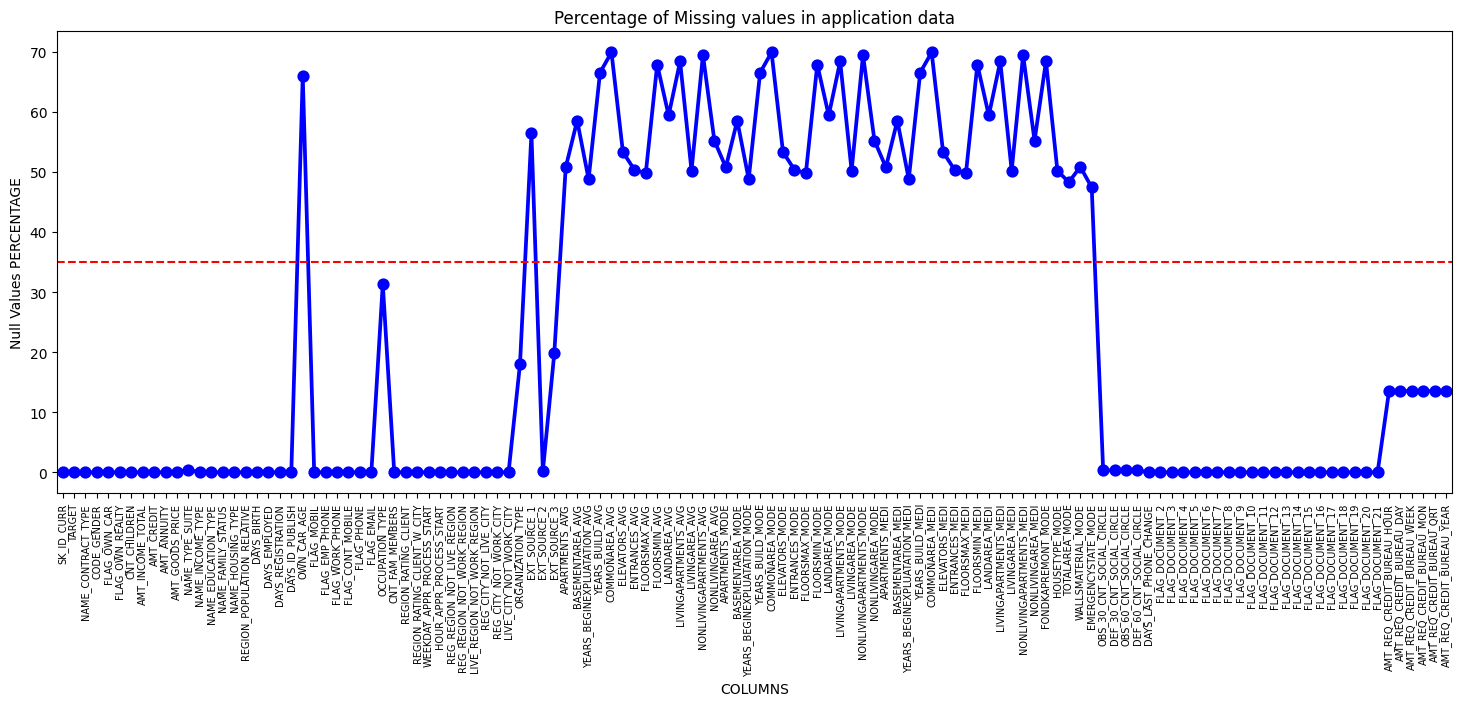

In [9]:
null_app = pd.DataFrame((app.isnull().sum())*100/app.shape[0]).reset_index()
null_app.columns = ['Column Name', 'Null Values Percentage']
fig = plt.figure(figsize=(18,6))
ax = sns.pointplot(x="Column Name",y="Null Values Percentage",data=null_app,color='blue')
plt.xticks(rotation =90,fontsize =7)
ax.axhline(35, ls='--',color='red')
plt.title("Percentage of Missing values in application data")
plt.ylabel("Null Values PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

In [10]:
missing_info = missing(app)
missing_info[missing_info['msng_pct']>40].shape[0]

49

49 of the columns contains greater then 40 percent of missing, we don't accept that so we will drop it, but may there is a relation between the missing in column and another column or a meaning for the missing

let's check that before removing the columns that > 40 precent missing

In [11]:
missing_after_remove_cols = missing(app)
missing_after_remove_cols[(missing_after_remove_cols['null_count'] > 1 )].sort_values(by= 'msng_pct', ascending=False).head(20)

,col_name,null_count,msng_pct
121,COMMONAREA_AVG,214865,69.872297
120,COMMONAREA_MODE,214865,69.872297
119,COMMONAREA_MEDI,214865,69.872297
118,NONLIVINGAPARTMENTS_AVG,213514,69.432963
117,NONLIVINGAPARTMENTS_MEDI,213514,69.432963
116,NONLIVINGAPARTMENTS_MODE,213514,69.432963
115,FONDKAPREMONT_MODE,210295,68.386172
114,LIVINGAPARTMENTS_MODE,210199,68.354953
113,LIVINGAPARTMENTS_MEDI,210199,68.354953
112,LIVINGAPARTMENTS_AVG,210199,68.354953


- there is a relationship between missing at Own_car_age and the person Acually has a car or not

-  if the person has no can , so no Car age!, so the missing is means that the value is equals 0

In [12]:
app.loc[app['OWN_CAR_AGE'].isna()==True,['FLAG_OWN_CAR','OWN_CAR_AGE']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 202929 entries, 0 to 307510
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   FLAG_OWN_CAR  202929 non-null  object 
 1   OWN_CAR_AGE   0 non-null       float64
dtypes: float64(1), object(1)
memory usage: 4.6+ MB


In [13]:
# the index that has car and car_age is missed
## NaN values for own_car_age could possibely be marked nan for thsoe who do not own a car
## the meaning of the null values not missing but equals 0

own_car_missing_index = app.loc[(app.FLAG_OWN_CAR=='Y') & (app.OWN_CAR_AGE.isna()==True)].index
own_car_missing_index.shape

(5,)

there was only 5 rows that is actually null, and we have 202929 recorded as a null values , so the values is should be 0, so we can not drop OWN_CAR_AGE

In [14]:
# we replace the null values with 0
app['OWN_CAR_AGE'].fillna(0,inplace = True)

In [15]:
missing_after_remove_cols = missing(app)
missing_after_remove_cols[(missing_after_remove_cols['null_count'] > 1 )].sort_values(by= 'msng_pct', ascending=False)

,col_name,null_count,msng_pct
121,COMMONAREA_MEDI,214865,69.872297
120,COMMONAREA_MODE,214865,69.872297
119,COMMONAREA_AVG,214865,69.872297
118,NONLIVINGAPARTMENTS_MODE,213514,69.432963
117,NONLIVINGAPARTMENTS_MEDI,213514,69.432963
...,...,...,...
58,AMT_GOODS_PRICE,278,0.090403
57,AMT_ANNUITY,12,0.003902
56,CODE_GENDER,4,0.001301
55,NAME_FAMILY_STATUS,2,0.000650


we see that no another relations in the missing between columns , so we will drop the missing columns > 40%

In [16]:
high_miss_values = app.columns[app.isna().sum()/len(app)*100 > 40]
app.drop(columns=high_miss_values[1:], inplace=True)

let's analyze the missing and check if there is a relation between the missing values between columns(missing Location)

we will check it using corr matrix of the missing

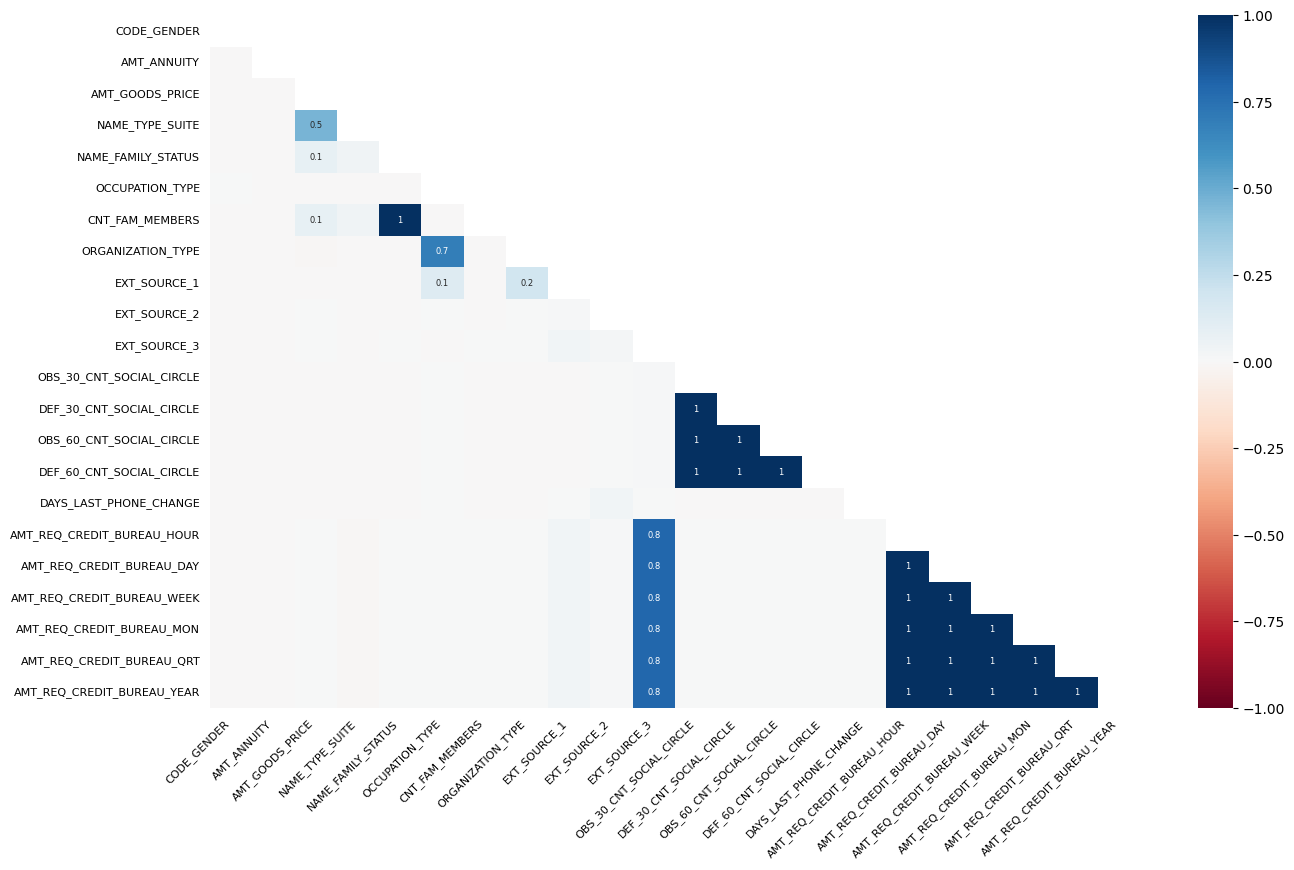

In [17]:
msno.heatmap(app, figsize=(15,9), fontsize=8);

In [18]:
data = app.copy()

AMT columns Missing are correlated, let's try to make it more clear

In [19]:
Amt = extract_col_starts_with(data=app, the_string='AMT_')
Amt

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

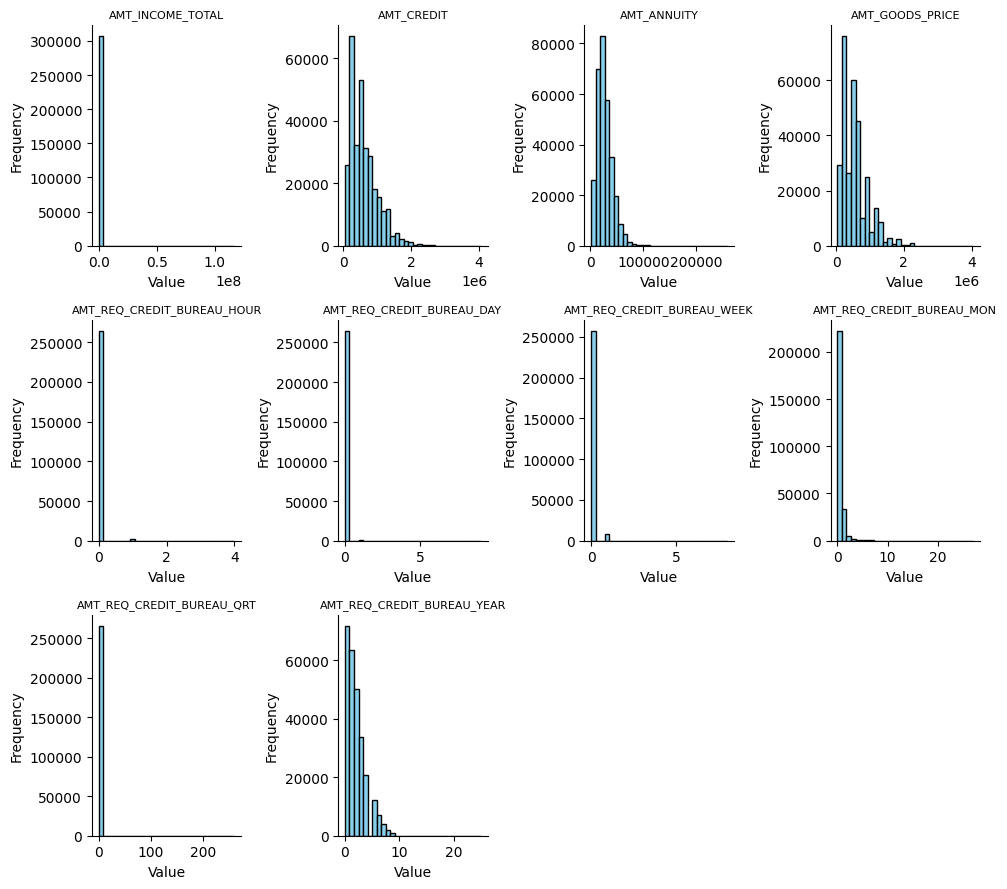

In [20]:
Multi_hist_ploting(app, Amt)

columns that contain nulls and no enough variation , we will drop it , not Valuable

In [21]:
# columns to drop
Amt_to_drop = Amt[4:9] + [Amt[0]]

In [22]:
new_data = app.drop(columns = Amt_to_drop)
#new_test_data = test_data.drop(columns = Amt_to_drop)
new_data.shape

(307511, 69)

Now before handling the missing ,Let's check if we need to drop another columns or Not

Flag Columns

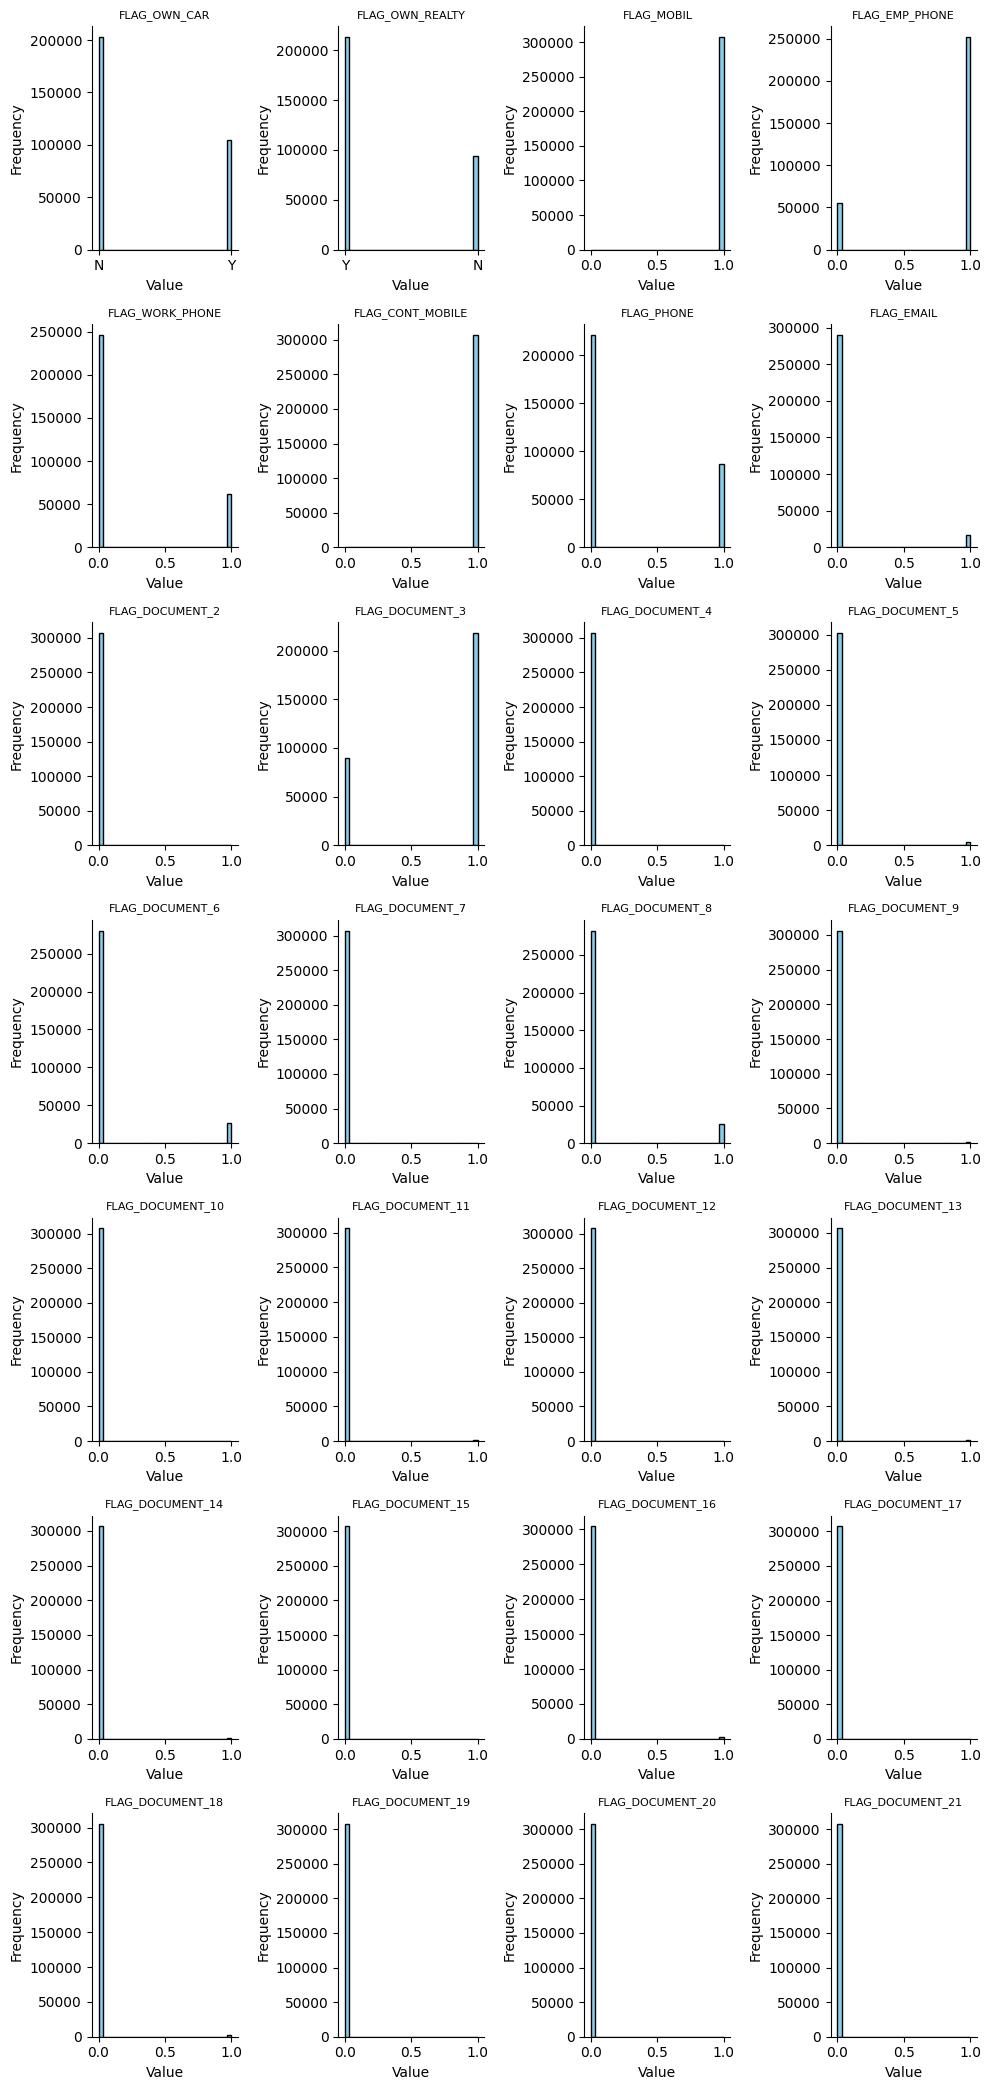

In [23]:
flags = extract_col_starts_with(data = app ,the_string="FLAG_")
Multi_hist_ploting(data = app ,columns =  flags)

In [24]:
flags_to_drop = [flags[2]]+ [flags[5]]+ flags[7:9] + flags[10:]
flags_to_drop

['FLAG_MOBIL',
 'FLAG_CONT_MOBILE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [25]:
app = app.drop(columns = flags_to_drop)
#test_data_after_drp_cols = new_test_data.drop(columns = flags_to_drop)
app.shape

(307511, 53)

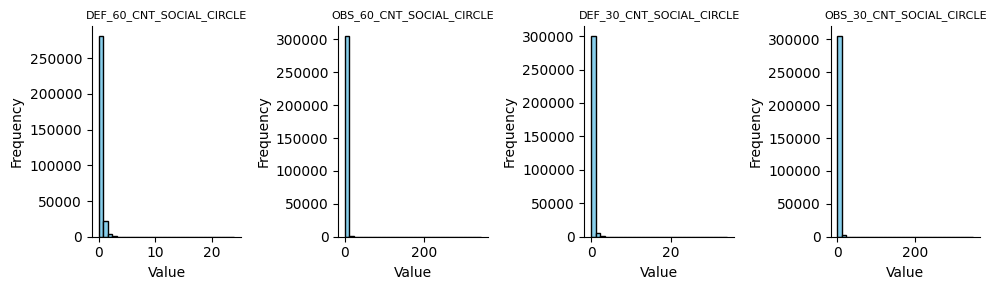

In [26]:
CNT_cols = ['DEF_60_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE',
            'DEF_30_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE']

Multi_hist_ploting(data = app[CNT_cols] ,columns =  CNT_cols)

In [27]:
# drop all ..._CNT_SOCIAL_CIRCLE columns
app.drop(columns=CNT_cols,inplace=True)

- performing data imputation for missing values in the 'occupation_type'
- column of a DataFrame (app) based on certain conditions regarding two other
-  columns: 'name_education_type' and 'amt_income_total'.

In [28]:
## Columns that requires imputation
pd.pivot_table(values = 'AMT_INCOME_TOTAL', index = 'OCCUPATION_TYPE', columns = 'NAME_EDUCATION_TYPE', data = app, aggfunc = 'median')

NAME_EDUCATION_TYPE,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special
OCCUPATION_TYPE,,,,,
Accountants,209250.0,180000.0,157500.0,186750.0,157500.0
Cleaning staff,202500.0,130500.0,117000.0,112500.0,112500.0
Cooking staff,67500.0,153000.0,135000.0,112500.0,126000.0
Core staff,225000.0,171000.0,153000.0,112500.0,135000.0
Drivers,162000.0,180000.0,180000.0,157500.0,180000.0
HR staff,NaN,180000.0,135000.0,NaN,157500.0
High skill tech staff,157500.0,180000.0,157500.0,139500.0,153000.0
IT staff,NaN,180000.0,180000.0,112500.0,157500.0
Laborers,225000.0,171000.0,157500.0,135000.0,144000.0


In [29]:
def replace_occupation_type(education, income_ranges, replacements):
    for (low, high), replacement in zip(income_ranges, replacements):
        condition = (app['NAME_EDUCATION_TYPE'] == education) & (app['AMT_INCOME_TOTAL'] > low) & (app['AMT_INCOME_TOTAL'] <= high)
        app.loc[condition, 'OCCUPATION_TYPE'] = app.loc[condition, 'OCCUPATION_TYPE'].replace(np.nan, replacement)

# Define income ranges and replacements for each education level
academic_degree_ranges = [(0, 100000), (100000, 150000), (150000, 175000), (175000, 200000), (200000, 225000), (225000, float('inf'))]
academic_degree_replacements = ['Low-skill Laborers', 'Sales staff', 'High skill tech staff', 'Security staff', 'Realty agents', 'Private service staff']

higher_education_ranges = [(0, 150000), (150000, 175000), (175000, 200000), (200000, float('inf'))]
higher_education_replacements = ['Cooking staff', 'Medicine staff', 'HR staff', 'Managers']

incomplete_higher_ranges = [(0, 120000), (120000, 150000), (150000, 175000), (175000, 200000), (200000, float('inf'))]
incomplete_higher_replacements = ['Cleaning staff', 'Secretaries', 'Core staff', 'IT staff', 'Managers']

lower_secondary_ranges = [(0, 120000), (120000, 150000), (150000, 175000), (175000, 200000), (200000, float('inf'))]
lower_secondary_replacements = ['Waiters/barmen staff', 'Sales staff', 'Secretaries', 'Accountants', 'Managers']

secondary_special_ranges = [(0, 120000), (120000, 150000), (150000, 175000), (175000, 200000), (200000, float('inf'))]
secondary_special_replacements = ['Cleaning staff', 'Low-skill Laborers', 'HR staff', 'Realty agents', 'Private service staff']

# Apply the function for each education type
replace_occupation_type('Academic degree', academic_degree_ranges, academic_degree_replacements)
replace_occupation_type('Higher education', higher_education_ranges, higher_education_replacements)
replace_occupation_type('Incomplete higher', incomplete_higher_ranges, incomplete_higher_replacements)
replace_occupation_type('Lower secondary', lower_secondary_ranges, lower_secondary_replacements)
replace_occupation_type('Secondary / secondary special', secondary_special_ranges, secondary_special_replacements)


-  ORGANIZATION_TYPE have too many levels. Performing encoding will lead to sparse data.
-  For ORGANIZATION_TYPE, the following mapping will be done:
-  Business_Finance : Business Entity Type 1, Business Entity Type 2, Business Entity Type 3, Bank, Insurance
-  Civil_Legal_Services : Security, Security Ministries, Police, Military, Emergency, Government, Legal Services
-  Industry_Trade : Industry: type 1 to Industry: type 13. Trade: type 1 to Trade: type 7
-  Travel_Hospitality_Real_Estate : Transport: type 1 to Transport: type 4, Hotel, Housing, Restaurant, Culture, Realtor
-  Communication : Mobile, Postal, Telecom, Advertising
-  Education_Healthcare : School, University, Kindergarten, Medicine
-  Goods_Producing_And_Services : Cleaning, Construction, Agriculture, Electricity, Services
-  Miscellaneous - XNA, Other, Religion

In [30]:

app['Organization_mapped'] = app['ORGANIZATION_TYPE'].apply(map_organization_type)


In [31]:
app.drop(columns='ORGANIZATION_TYPE',inplace=True)

In [32]:
missing_after_remove_cols = missing(app)
missing_after_remove_cols[(missing_after_remove_cols['null_count'] > 1 )].sort_values(by= 'msng_pct', ascending=False)

,col_name,null_count,msng_pct
48,EXT_SOURCE_1,173378,56.381073
47,EXT_SOURCE_3,60965,19.825307
41,AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.501631
42,AMT_REQ_CREDIT_BUREAU_HOUR,41519,13.501631
43,AMT_REQ_CREDIT_BUREAU_DAY,41519,13.501631
44,AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.501631
45,AMT_REQ_CREDIT_BUREAU_MON,41519,13.501631
46,AMT_REQ_CREDIT_BUREAU_QRT,41519,13.501631
40,NAME_TYPE_SUITE,1292,0.420148
39,EXT_SOURCE_2,660,0.214626


##### Ask Eslam

In [33]:
app.dropna(thresh=41).shape[0] /new_data.shape[0]


0.9994731895769582

In [34]:
app.TARGET.value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

if we remove nulls with thresh = 41 we will lose 16 percent of the data, maybe accepted but the real problem is with class of the target because we need to fix the class imbalance , so if the nulls in the minor class we can't remove it

In [35]:
app['TARGET'].value_counts().values

array([282686,  24825], dtype=int64)

In [36]:
classes = app.dropna(thresh=44)
classes['TARGET'].value_counts().values / app['TARGET'].value_counts().values

array([0.86830971, 0.82710977])

we can Drop the missing that Related to Class 0 (Not Default)

In [37]:
app[(app['TARGET']==0)].dropna(thresh=44).shape[0] /app[(app['TARGET']==0)].shape[0]


0.8683097146657422

In [38]:
# Training Data
zero_new_data =app[(app['TARGET']==0)].dropna(thresh=44)
one_new_data = app[(app['TARGET']==1)]
app = pd.concat([zero_new_data, one_new_data], axis = 0).sort_values(by = 'SK_ID_CURR')


app.shape

(270284, 49)

In [39]:
app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 

In [40]:
mis = missing(app)
mis[mis['null_count']>1].sort_values(by='null_count', ascending = False)

,col_name,null_count,msng_pct
48,EXT_SOURCE_1,151079,55.896390
47,EXT_SOURCE_3,23738,8.782614
41,AMT_REQ_CREDIT_BUREAU_YEAR,4292,1.587959
42,AMT_REQ_CREDIT_BUREAU_HOUR,4292,1.587959
43,AMT_REQ_CREDIT_BUREAU_DAY,4292,1.587959
44,AMT_REQ_CREDIT_BUREAU_WEEK,4292,1.587959
45,AMT_REQ_CREDIT_BUREAU_MON,4292,1.587959
46,AMT_REQ_CREDIT_BUREAU_QRT,4292,1.587959
40,NAME_TYPE_SUITE,1196,0.442498
39,EXT_SOURCE_2,539,0.199420


In [41]:
ctr = ['SK_ID_CURR','NAME_TYPE_SUITE',
       'CNT_CHILDREN','DAYS_BIRTH',
       'CNT_FAM_MEMBERS' ,'NAME_EDUCATION_TYPE',
       'DAYS_ID_PUBLISH', 'FLAG_EMP_PHONE']

app.drop(columns = ctr, inplace = True)


In [42]:
mis = missing(app)
mis[mis['null_count']>1].sort_values(by='null_count', ascending = False)

,col_name,null_count,msng_pct
40,EXT_SOURCE_1,151079,55.896390
39,EXT_SOURCE_3,23738,8.782614
33,AMT_REQ_CREDIT_BUREAU_YEAR,4292,1.587959
34,AMT_REQ_CREDIT_BUREAU_HOUR,4292,1.587959
35,AMT_REQ_CREDIT_BUREAU_DAY,4292,1.587959
36,AMT_REQ_CREDIT_BUREAU_WEEK,4292,1.587959
37,AMT_REQ_CREDIT_BUREAU_MON,4292,1.587959
38,AMT_REQ_CREDIT_BUREAU_QRT,4292,1.587959
32,EXT_SOURCE_2,539,0.199420
31,AMT_GOODS_PRICE,238,0.088056


In [43]:
cols = mis[mis['null_count']>1].sort_values(by='null_count', ascending = False)['col_name'].values

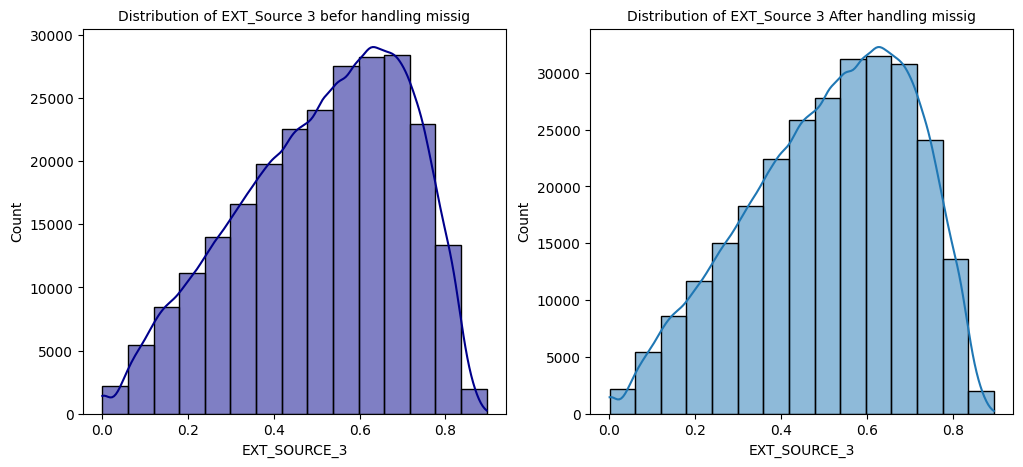

In [44]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.title('Distribution of EXT_Source 3 befor handling missig', fontsize = 10)
sns.histplot(app['EXT_SOURCE_3'], kde=True, bins = 15, color= 'darkblue' )
plt.subplot(122)
plt.title('Distribution of EXT_Source 3 After handling missig', fontsize = 10)
sns.histplot(app['EXT_SOURCE_3'].interpolate(method= 'linear'), bins = 15, kde=True)
plt.show()

No chnage in the distribution of the Variable so interpolate method(predicting the missing using linear model) doesn't change the behavior of the data

In [45]:
app['EXT_SOURCE_3'].interpolate(method= 'linear', inplace = True)

In [46]:
mis = missing(app)
mis[mis['null_count']>1].sort_values(by='null_count', ascending = False)

,col_name,null_count,msng_pct
40,EXT_SOURCE_1,151079,55.896390
34,AMT_REQ_CREDIT_BUREAU_YEAR,4292,1.587959
35,AMT_REQ_CREDIT_BUREAU_HOUR,4292,1.587959
36,AMT_REQ_CREDIT_BUREAU_DAY,4292,1.587959
37,AMT_REQ_CREDIT_BUREAU_WEEK,4292,1.587959
38,AMT_REQ_CREDIT_BUREAU_MON,4292,1.587959
39,AMT_REQ_CREDIT_BUREAU_QRT,4292,1.587959
33,EXT_SOURCE_2,539,0.199420
32,AMT_GOODS_PRICE,238,0.088056
31,AMT_ANNUITY,11,0.004070


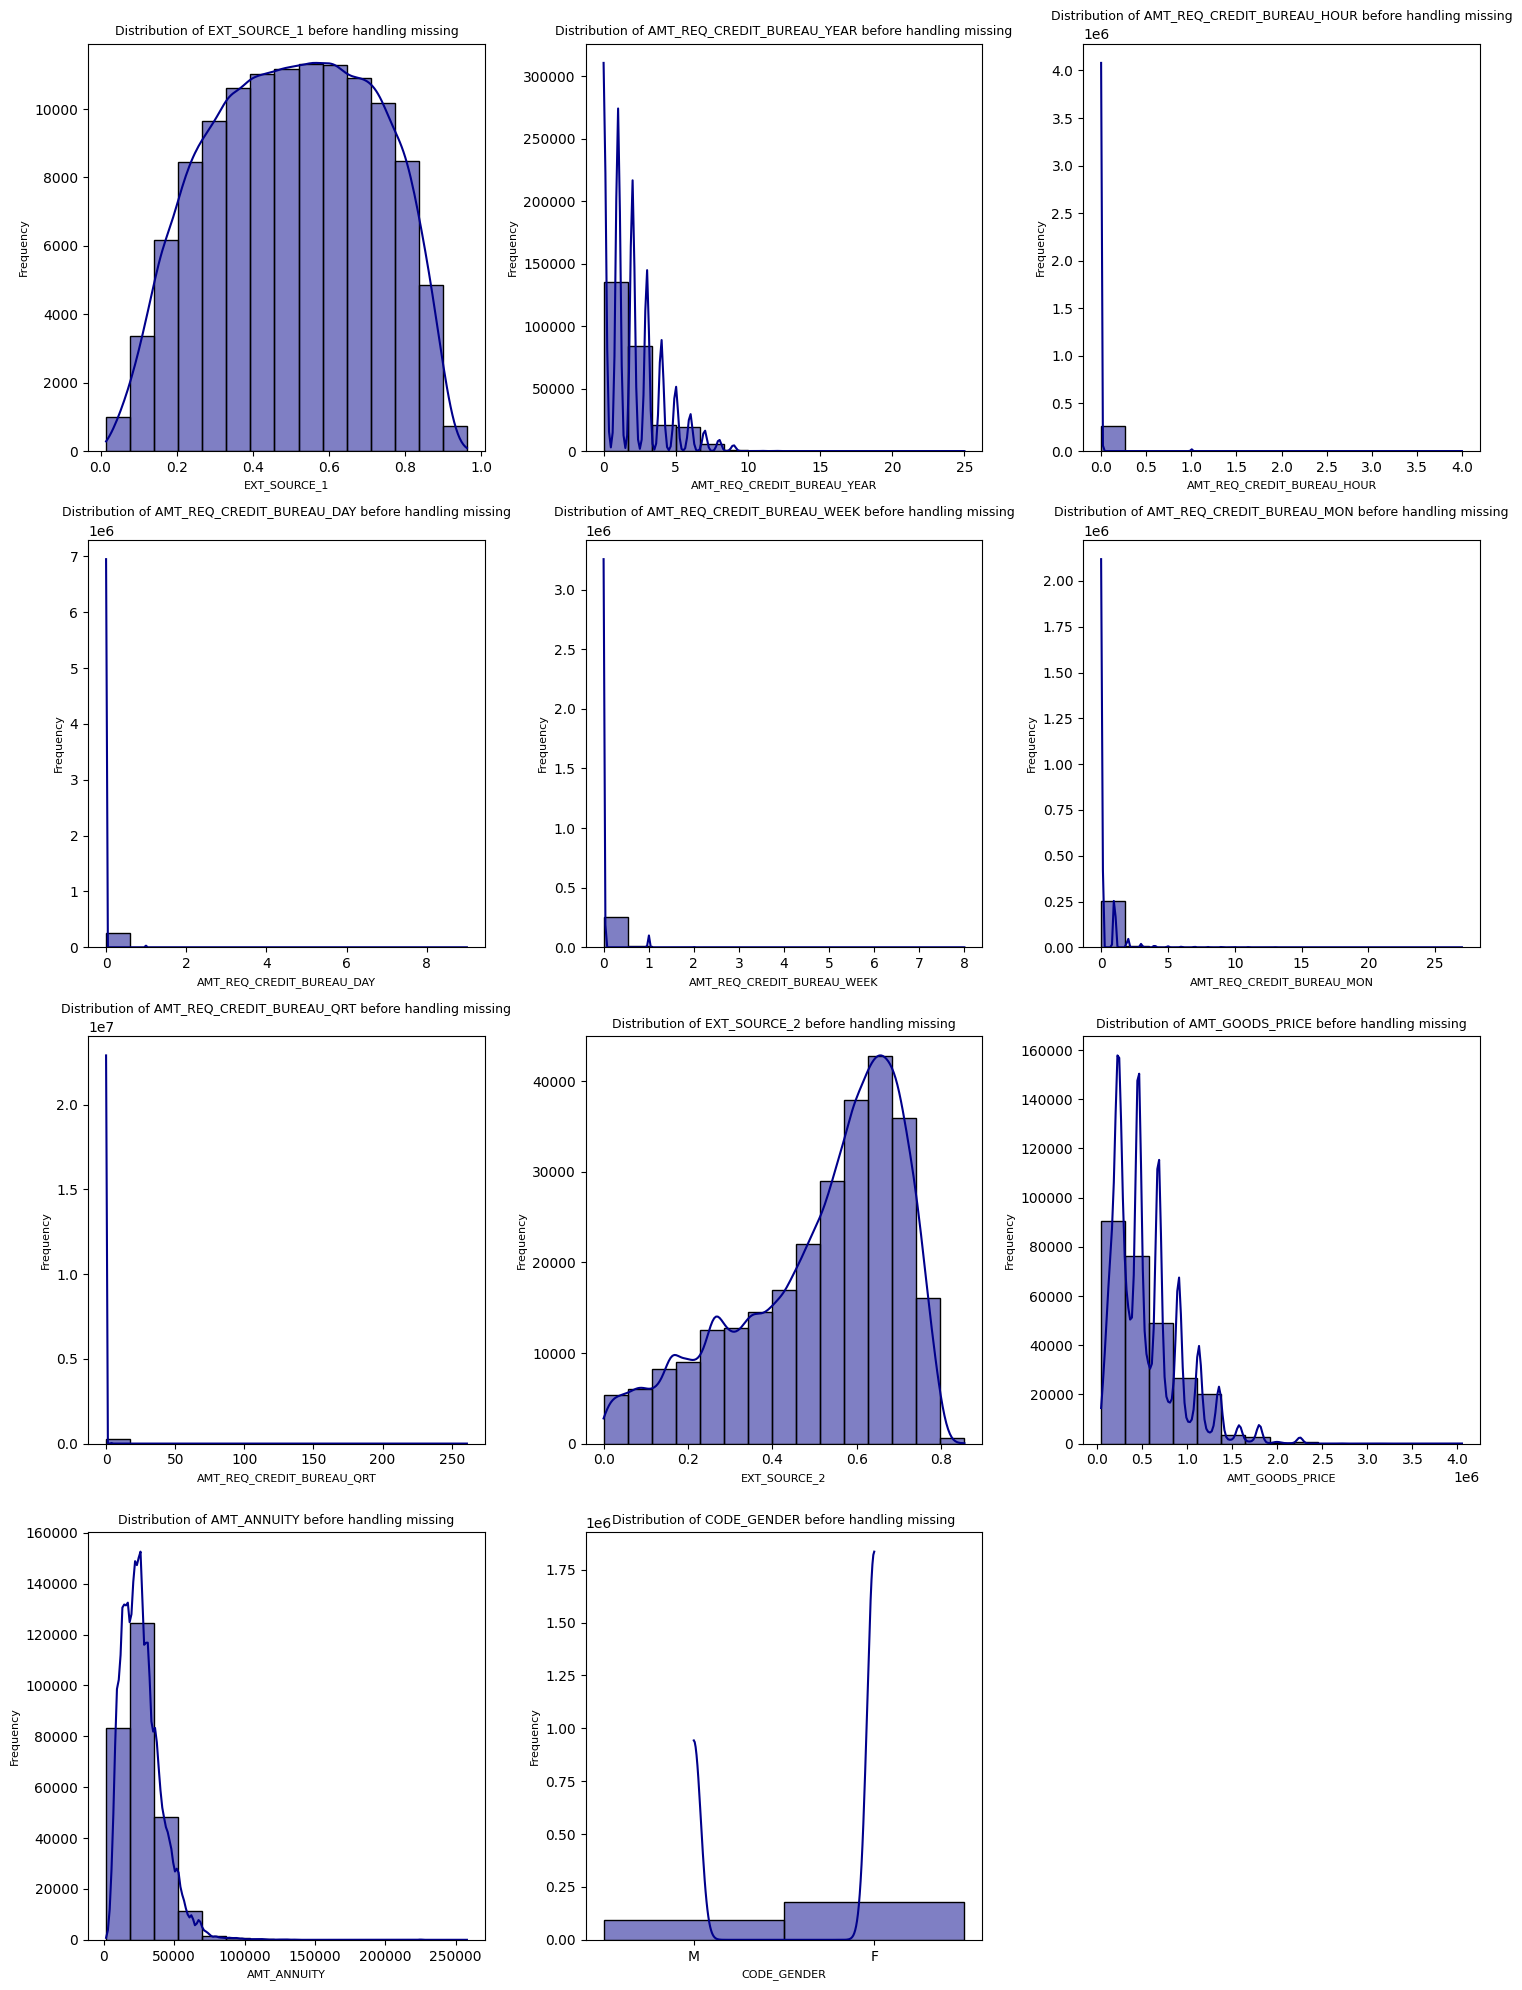

In [47]:
col_names_to_plot = mis[mis['null_count']>1].sort_values(by='null_count', ascending = False)['col_name'].values
# Determine the number of subplots needed
num_plots = len(col_names_to_plot)

# Calculate the number of rows and columns needed for the subplots
cols = 3
rows = math.ceil(num_plots / cols)

# Create a figure with a grid of subplots
plt.figure(figsize=(15, rows * 5))  # Adjust the size of the entire figure based on the number of rows

# Loop through the columns and create a subplot for each
for i, col in enumerate(col_names_to_plot):
    plt.subplot(rows, cols, i + 1)  # Create a grid, filling it row by row
    plt.title(f'Distribution of {col} before handling missing', fontsize=9)
    sns.histplot(app[col], kde=True, bins=15, color='darkblue')
    plt.xlabel(col, fontsize=8)  # X-axis label
    plt.ylabel('Frequency', fontsize=8)  # Y-axis label

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


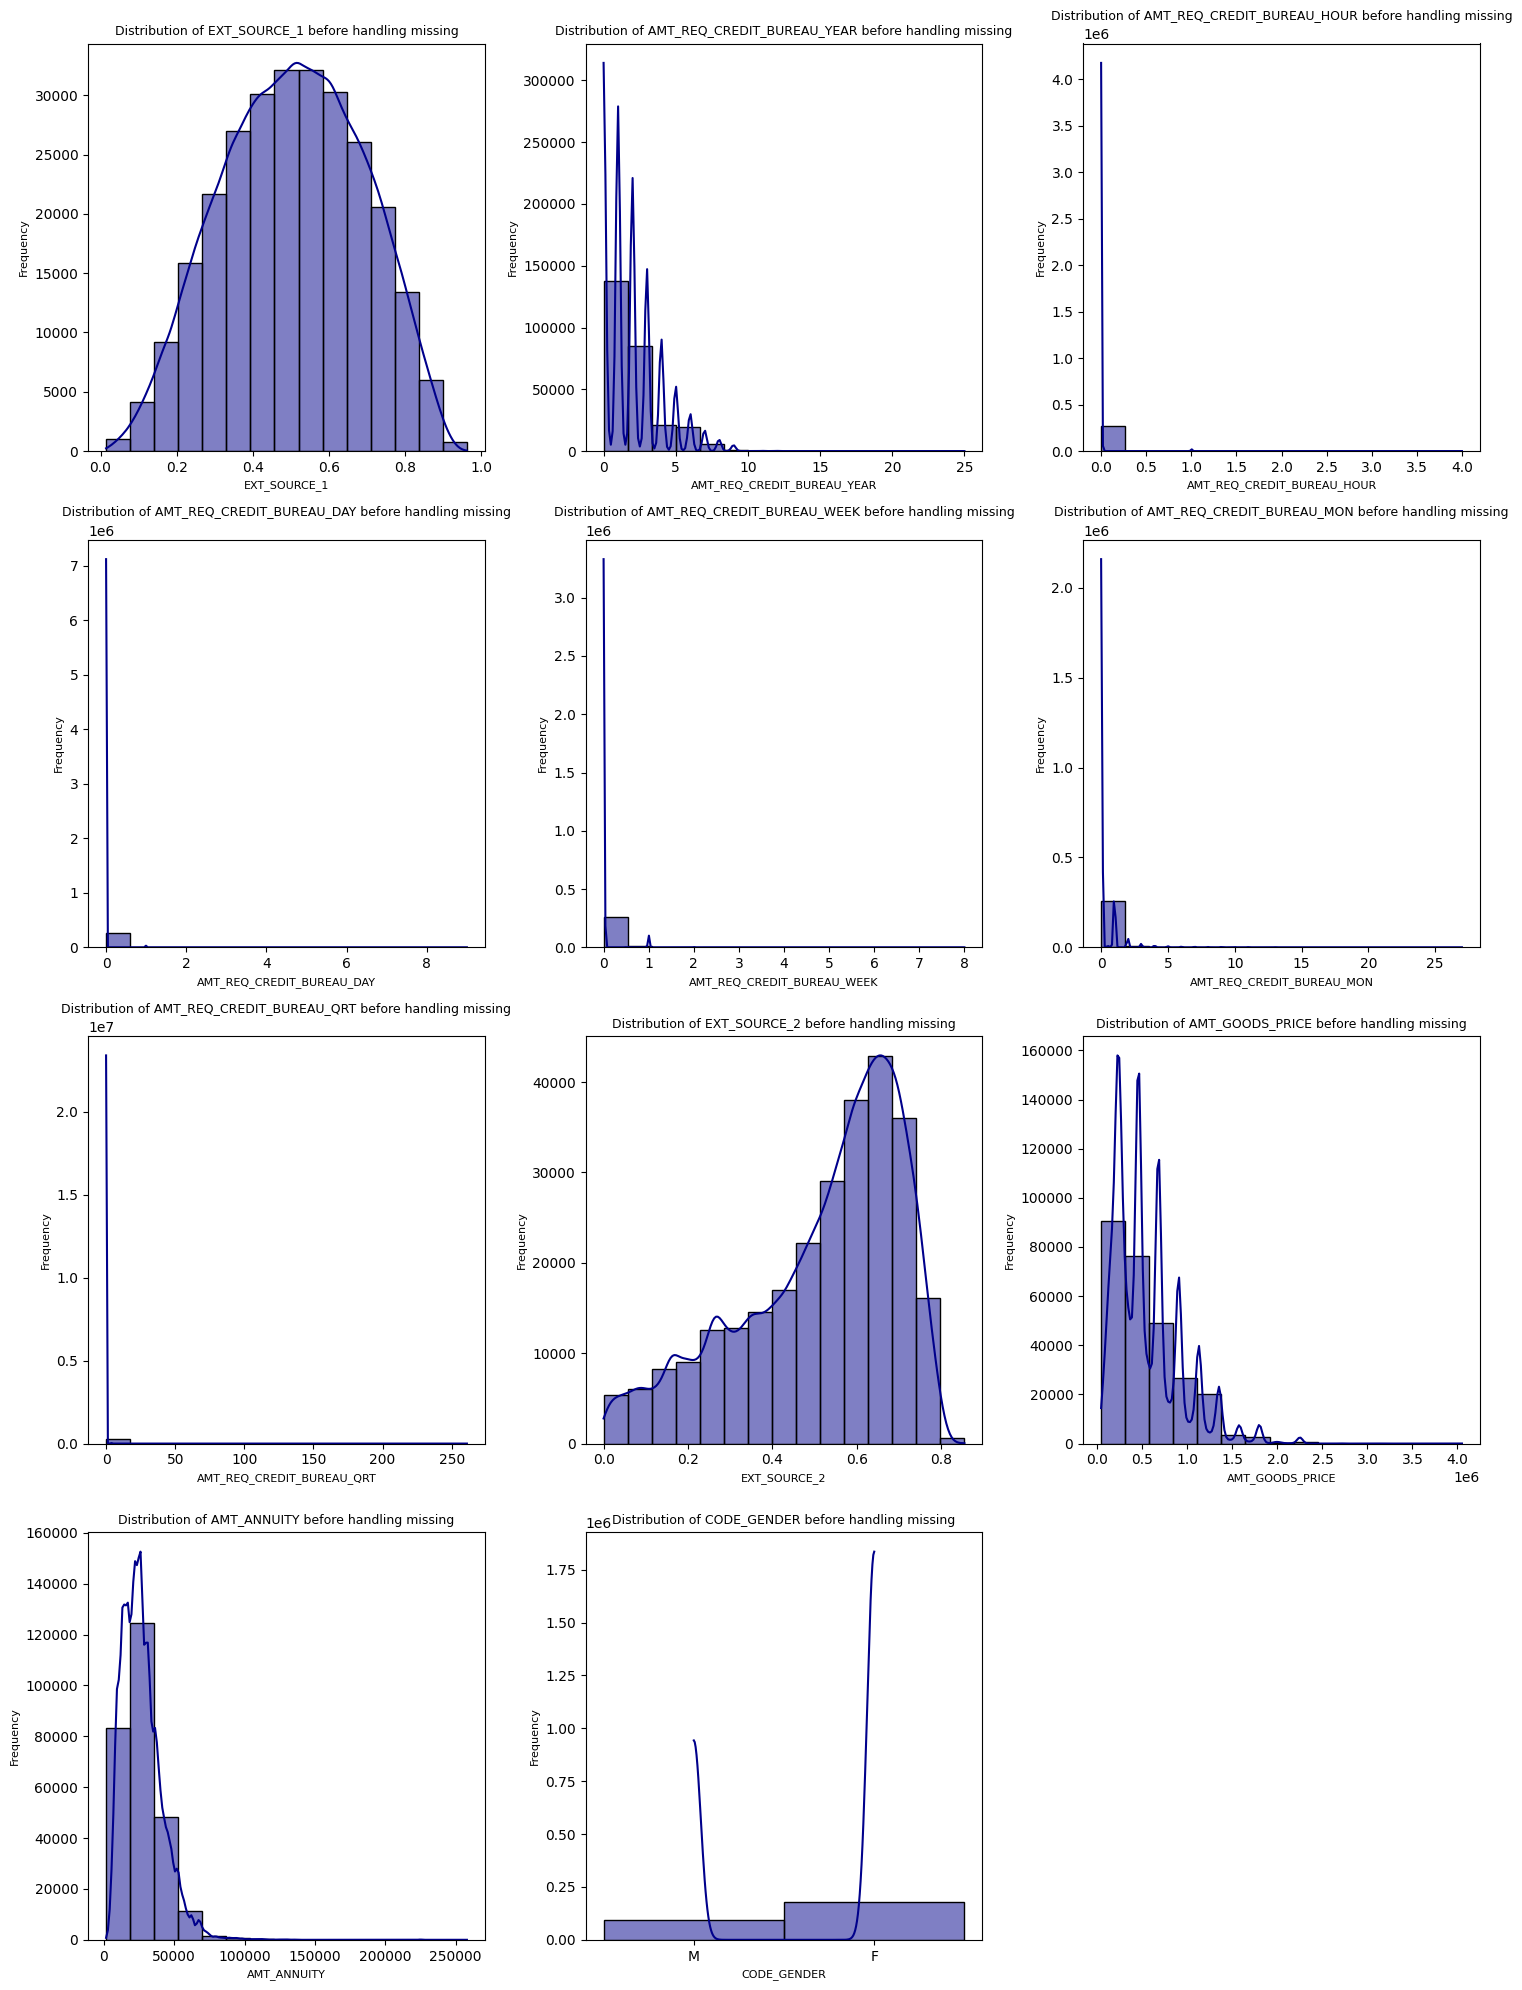

In [48]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Determine the number of subplots needed
num_plots = len(col_names_to_plot)

# Calculate the number of rows and columns needed for the subplots
cols = 3
rows = math.ceil(num_plots / cols)

# Create a figure with a dynamic grid of subplots
plt.figure(figsize=(15, rows * 5))  # Adjust the size of the entire figure

# Loop through the columns and create a subplot for each
for i, col in enumerate(col_names_to_plot):
    plt.subplot(rows, cols, i + 1)  # Create a grid, filling it row by row
    plt.title(f'Distribution of {col} before handling missing', fontsize=9)
    sns.histplot(app[col].interpolate(method='linear'), kde=True, bins=15, color='darkblue')
    plt.xlabel(col, fontsize=8)  # X-axis label
    plt.ylabel('Frequency', fontsize=8)  # Y-axis label

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


# # Create a figure with a 3x3 grid of subplots
# plt.figure(figsize=(15,10))  # Adjust the size of the entire figure

# # Loop through the columns and create a subplot for each
# for i, col in enumerate(col_names_to_plot):
#     plt.subplot(3, 3, i + 1)  # Create a 3x3 grid, filling it row by row
#     plt.title(f'Distribution of {col} before handling missing', fontsize=9)
#     sns.histplot(app[col].interpolate(method = 'linear'), kde=True, bins=15, color='darkblue')
#     plt.xlabel(col, fontsize=8)  # X-axis label
#     plt.ylabel('Frequency', fontsize=8)  # Y-axis label

# # Adjust the layout to prevent overlap
# plt.tight_layout()

# # Show the plot
# plt.show()


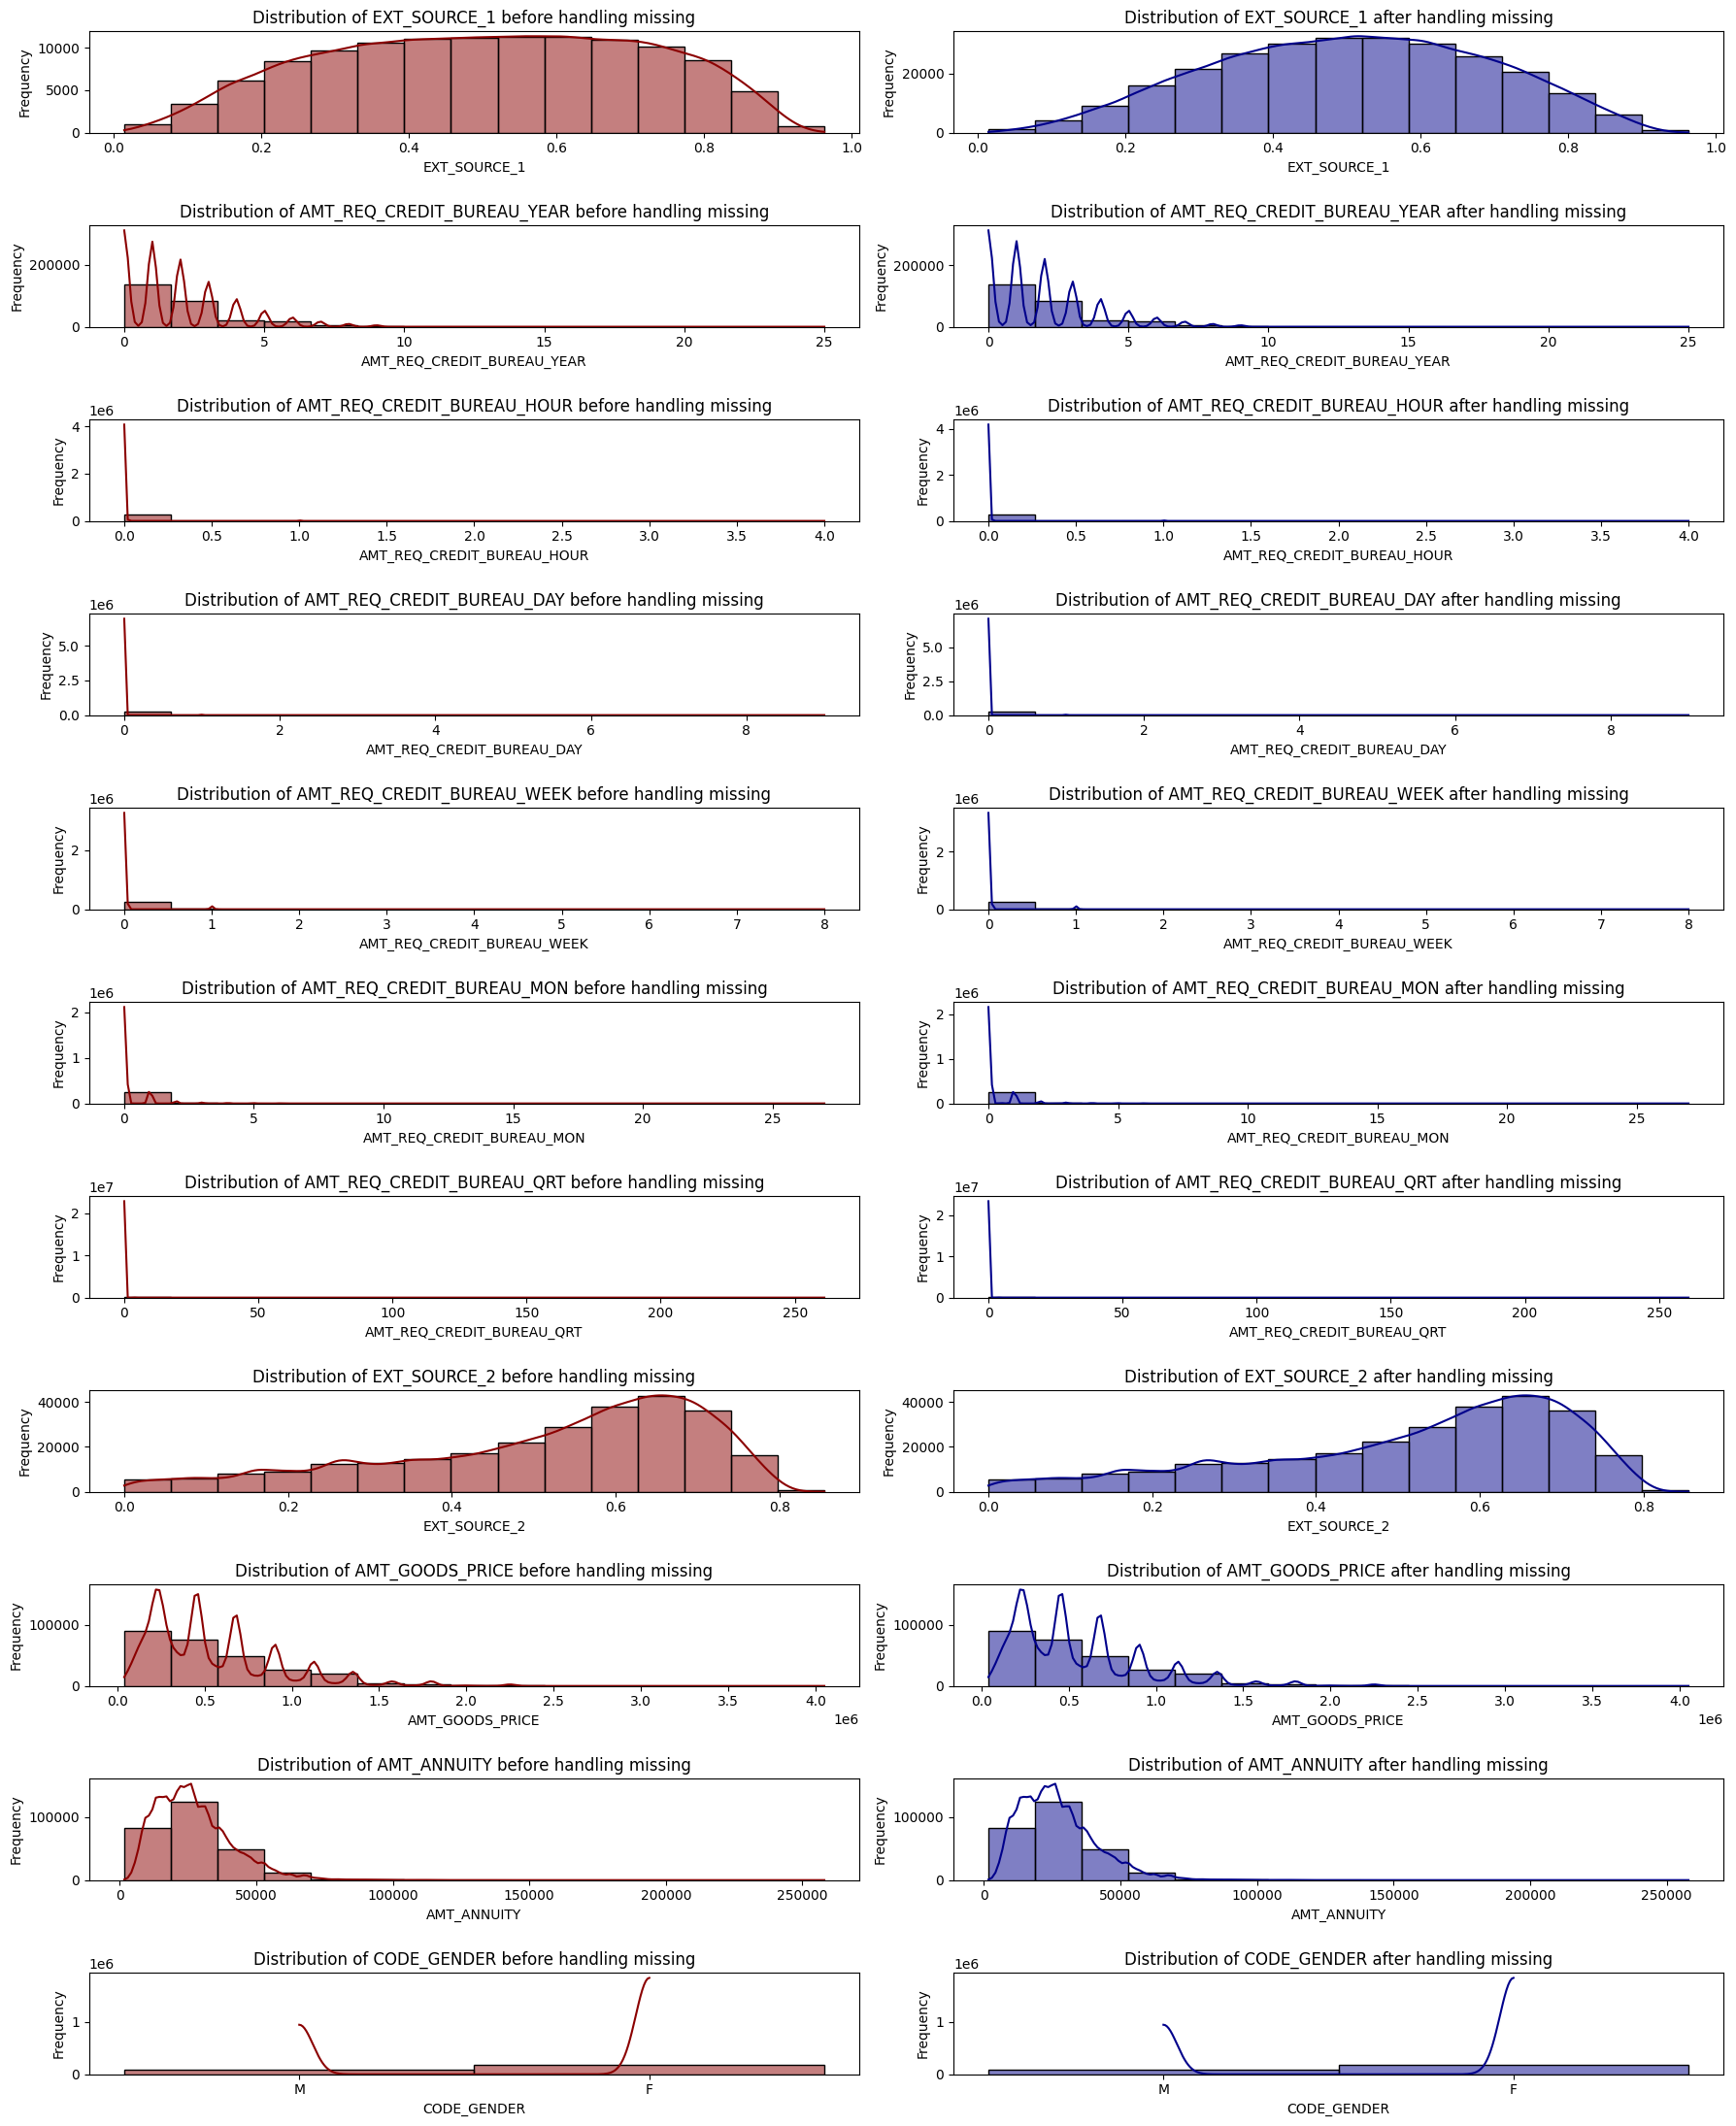

In [49]:
# Calculate the number of rows needed (2 subplots per column: before and after)
n_cols = 3  # Number of columns in the grid
n_rows = len(col_names_to_plot)  # One row per feature, with 2 subplots per row

# Create a figure with subplots
plt.figure(figsize=(18, 2 * n_rows))  # Adjust size as needed

# Loop through the columns and create subplots for before and after handling missing data
for i, col in enumerate(col_names_to_plot):
    # Plot before handling missing values
    plt.subplot(n_rows, 2, 2 * i + 1)
    sns.histplot(app[col], kde=True, bins=15, color='darkred')
    plt.title(f'Distribution of {col} before handling missing', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)

    # Plot after handling missing values (interpolated)
    plt.subplot(n_rows, 2, 2 * i + 2)
    sns.histplot(app[col].interpolate(method='linear'), kde=True, bins=15, color='darkblue')
    plt.title(f'Distribution of {col} after handling missing', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [50]:
app.interpolate(mehtod = 'linear', inplace = True)
# full_test_data.interpolate(mehtod = 'linear', inplace = True)
app.isnull().sum().sum()

5

In [51]:
mis = missing(app)
mis[mis['null_count']>1].sort_values(by='null_count', ascending = False)

,col_name,null_count,msng_pct
40,CODE_GENDER,4,0.00148


In [52]:
app.dropna(inplace=True)

##### Handlling the negative and inconsistance data

In [53]:
# Select only the numeric columns
numeric_df = app.select_dtypes(include=[np.number])

# Identify columns with negative values in the numeric DataFrame
negative_columns = numeric_df.columns[(numeric_df < 0).any()]

# Handle negative values by converting them to absolute values in training data
app[negative_columns] = app[negative_columns].abs()


In [54]:
app.isnull().sum().sort_values(ascending=False)

TARGET                         0
WEEKDAY_APPR_PROCESS_START     0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
EXT_SOURCE_1                   0
EXT_SOURCE_2                   0
EXT_SOURCE_3                   0
DAYS_LAST_PHONE_CHANGE         0
FLAG_DOCUMENT_3                0
AMT_REQ_CREDIT_BUREAU_HOUR     0
AMT_REQ_CREDIT_BUREAU_DAY      0
AMT_REQ_CREDIT_BUREAU_WEEK     0
AMT_REQ_CREDIT_BUREAU_MON      0
AMT_REQ_CREDIT_BUREAU_QRT      0
AMT_REQ_CREDIT_BUREAU_YEAR     0
HOUR_APPR_PROCESS_START        0
REGION_RATING_CLIENT_W_CITY    0
NAME_CONTRACT_TYPE             0
REGION_RATING_CLIENT           0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_INCOM

In [55]:
app.shape

(270279, 41)

## EDA

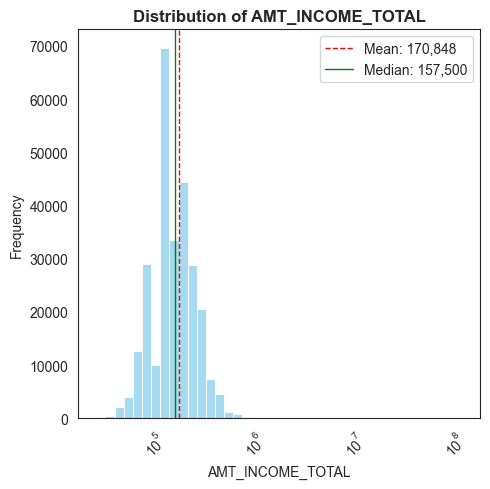

In [56]:
# Set the Seaborn style for a clean background without gridlines
sns.set_style("white")

# Create a histogram plot
plt.figure(figsize=(5, 5))

# Plotting with custom bins and a log scale to handle potential skewness
sns.histplot(data=app, x='AMT_INCOME_TOTAL', color='skyblue', bins=40, log_scale=(True, False))

# Calculate mean and median
mean_income = app['AMT_INCOME_TOTAL'].mean()
median_income = app['AMT_INCOME_TOTAL'].median()

# Add lines for mean and median
plt.axvline(mean_income, color='red', linestyle='--', linewidth=1, label=f'Mean: {mean_income:,.0f}')
plt.axvline(median_income, color='green', linestyle='-', linewidth=1, label=f'Median: {median_income:,.0f}')

# Customize ticks, labels, and title
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.title('Distribution of AMT_INCOME_TOTAL', fontsize=12, fontweight='bold')
plt.xlabel('AMT_INCOME_TOTAL', fontsize=10)
plt.ylabel('Frequency', fontsize=10)

# Add a legend to distinguish mean and median lines
plt.legend(fontsize=10)

# Remove the grid
plt.grid(False)

# Tighten layout to avoid overlapping
plt.tight_layout()

# Show the plot
plt.show()

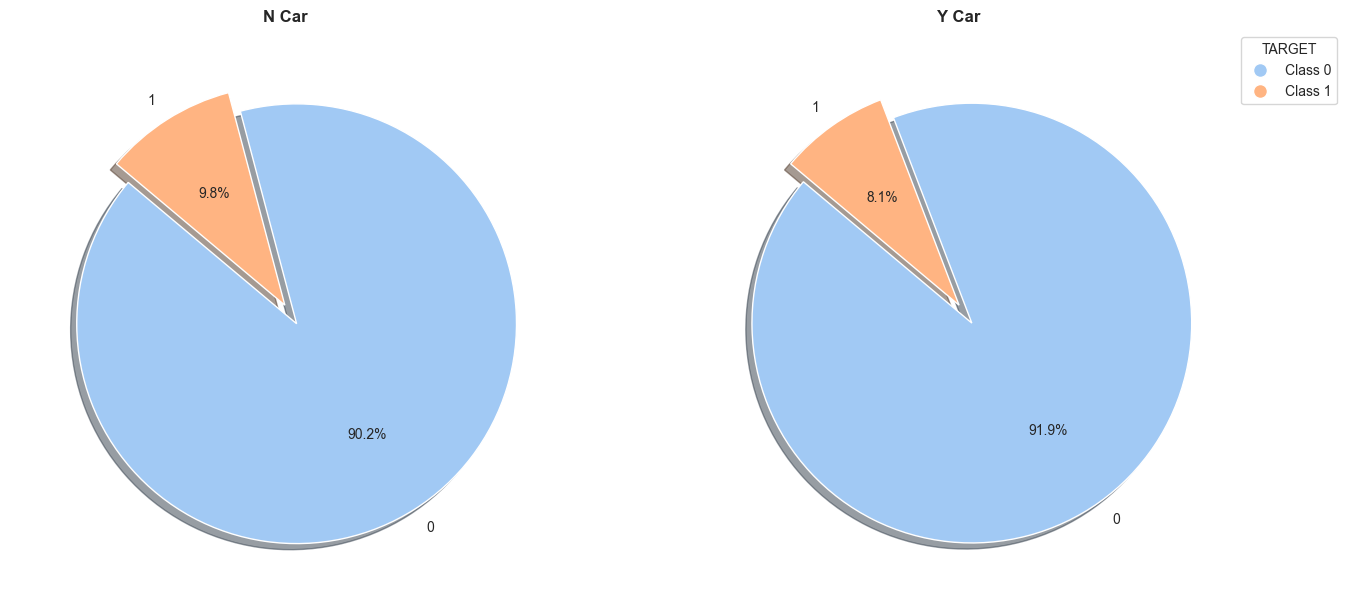

In [57]:
# Check if 'OWN_CAR' column exists
if 'FLAG_OWN_CAR' not in app.columns:
    raise ValueError("The column 'OWN_CAR' does not exist in the DataFrame.")

# Filter out the data where OWN_CAR is not 'Unknown'
filtered_app = app[app['FLAG_OWN_CAR'] != 'Unknown']

# Check for any remaining NaN values in OWN_CAR and drop them if necessary
filtered_app = filtered_app.dropna(subset=['FLAG_OWN_CAR'])

# Group by OWN_CAR and count TARGET values
car_groups = filtered_app.groupby('FLAG_OWN_CAR')

# Set up the figure and axes
fig, axes = plt.subplots(1, len(car_groups), figsize=(15, 6), subplot_kw=dict(aspect='equal'))

# Define a color palette for the pie charts
colors = sns.color_palette('pastel')

# Iterate over car groups to create pie charts
for (car_status, group), ax in zip(car_groups, axes):
    target_counts = group['TARGET'].value_counts()
    ax.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, shadow=True, explode=(0.1, 0) if len(target_counts) > 1 else (0,))

    # Add a title for each pie chart
    ax.set_title(f'{car_status} Car', fontsize=12, fontweight='bold')

# Create a combined legend for both pie charts
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, linestyle='') for color in colors]
labels = ['Class 0', 'Class 1']  # Adjust labels based on your TARGET classes
plt.legend(handles, labels, title='TARGET', loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)

# Adjust layout to make room for the legend
plt.tight_layout()

# Show the plot
plt.show()



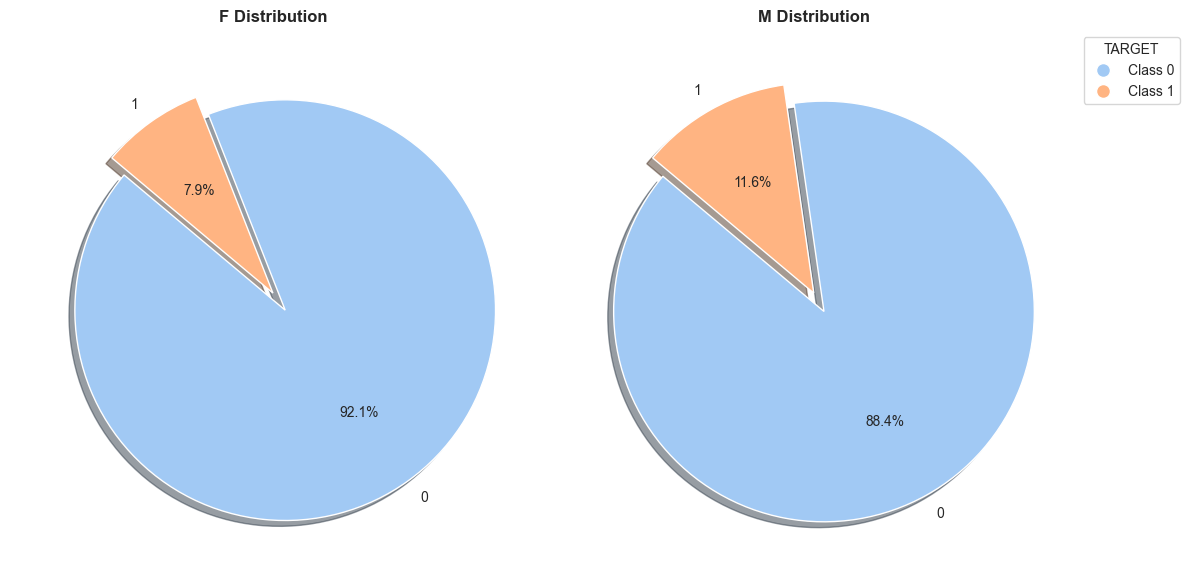

In [58]:
# Filter out the data for the pie charts
gender_groups = app[app['CODE_GENDER'] != 'XNA'].groupby('CODE_GENDER')

# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 6), subplot_kw=dict(aspect='equal'))

# Define a color palette for the pie charts
colors = sns.color_palette('pastel')

# Iterate over gender groups to create pie charts
for (gender, group), ax in zip(gender_groups, axes):
    target_counts = group['TARGET'].value_counts()
    ax.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, shadow=True, explode=(0.1, 0) if len(target_counts) > 1 else (0,))

    # Add a title for each pie chart
    ax.set_title(f'{gender} Distribution', fontsize=12, fontweight='bold')

# Create a combined legend for both pie charts
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, linestyle='') for color in colors]
labels = ['Class 0', 'Class 1']  # Adjust labels based on your TARGET classes
plt.legend(handles, labels, title='TARGET', loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)

# Adjust layout to make room for the legend
plt.tight_layout()

# Show the plot
plt.show()

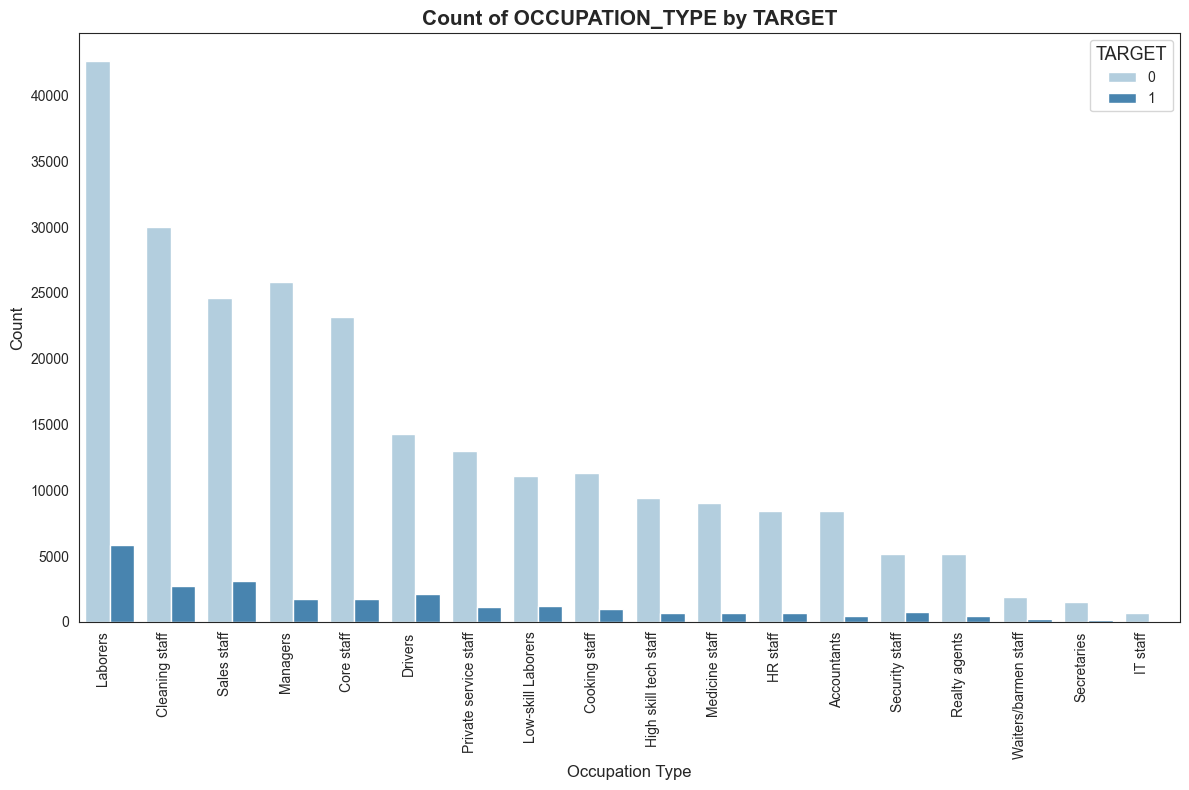

In [59]:
# Copy the DataFrame to avoid modifying the original data
new_df = app.copy()

# Handle missing values in OCCUPATION_TYPE if needed (e.g., fill or drop)
new_df = new_df.dropna(subset=['OCCUPATION_TYPE'])

# Group by OCCUPATION_TYPE and TARGET, then count occurrences
occupation_counts = new_df.groupby(['OCCUPATION_TYPE', 'TARGET']).size().reset_index(name='Count')

# Sort by OCCUPATION_TYPE count in descending order
sorted_counts = occupation_counts.groupby('OCCUPATION_TYPE')['Count'].sum().sort_values(ascending=False).index
occupation_counts['OCCUPATION_TYPE'] = pd.Categorical(occupation_counts['OCCUPATION_TYPE'], categories=sorted_counts, ordered=True)

plt.figure(figsize=(12, 8))

# Create the grouped bar plot with hue set to TARGET
sns.barplot(x='OCCUPATION_TYPE', y='Count', hue='TARGET', data=occupation_counts, palette='Blues')

# Adding titles and labels
plt.title('Count of OCCUPATION_TYPE by TARGET', fontsize=15, fontweight='bold')
plt.xlabel('Occupation Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90, ha='right', fontsize=10)

# Show the legend with better spacing
plt.legend(title='TARGET', title_fontsize='13', fontsize='10', loc='upper right')

# Tight layout to adjust spacing
plt.tight_layout()

# Show the plot
plt.show()



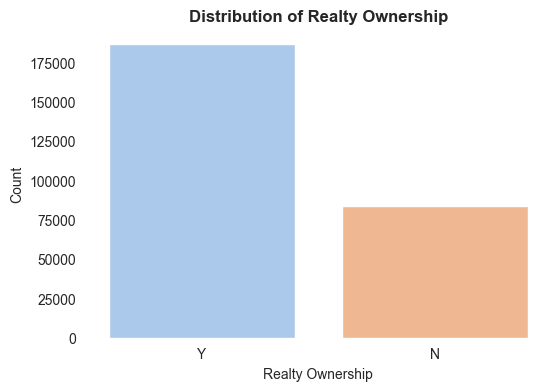

In [60]:
# Calculate the distribution of loan contracts
realty_counts = app['FLAG_OWN_REALTY'].value_counts().reset_index()
realty_counts.columns = ['FLAG_OWN_REALTY', 'Count']

# Set the Seaborn style to 'white' for a clean background without gridlines
sns.set_style("white")

# Create a bar plot with a pastel color palette
plt.figure(figsize=(6, 4))
sns.barplot(x='FLAG_OWN_REALTY', y='Count', data=realty_counts, palette='pastel')

# Remove top and right spines and grid lines
sns.despine(left=True, bottom=True)

# Set title and labels
plt.title('Distribution of Realty Ownership', loc = 'center', fontsize = 12,fontweight='bold');
plt.xlabel('Realty Ownership', fontsize= 10);
plt.ylabel('Count', fontsize= 10);

# Show the plot
plt.show()


## Modelling

### Preprocessing for Modelling

one hot encoding for categorical features

In [61]:
data_for_modelling = pd.get_dummies(app)
data_for_modelling.shape

(270279, 93)

In [62]:
# split the data to X features and target vector y
X = data_for_modelling.drop(columns=['TARGET'])
y = data_for_modelling['TARGET']

In [63]:
# spliting the data to train and test data
X_train, X_test , y_train, y_test = train_test_split(X, y,
                                                     test_size=0.3,
                                                       random_state=42,
                                                       stratify=y)


1 - Logistic Regression
- Logistic regression is a commonly used algorithm for binary classification tasks, and is suitable for predicting whether a loan applicant is likely to default or not.
- Reason to choose: relatively simple and interpretable algorithm.

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     73636
           1       0.00      0.00      0.00      7448

    accuracy                           0.91     81084
   macro avg       0.45      0.50      0.48     81084
weighted avg       0.82      0.91      0.86     81084



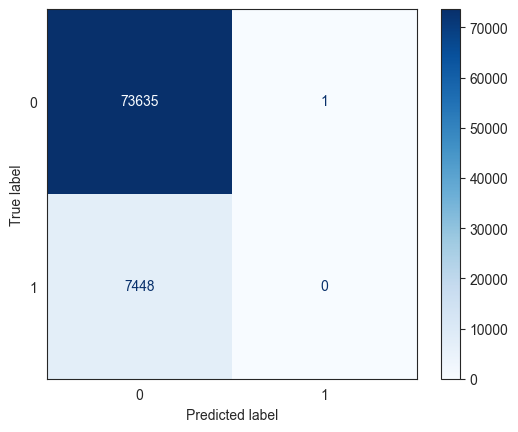

In [64]:
# Initialize a logistic regression model
log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)


y_pred = log_reg.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap=plt.cm.Blues)
plt.show()

The model can't classify class 1(Defualters) that we acuatlly target it, so let's check the class distribution

In [65]:
y.value_counts()

TARGET
0    245454
1     24825
Name: count, dtype: int64

okey, we have the problem of imbalanced data
- we will handle it using SMOTE OverSampling

In [66]:

# Step 3: Apply Random Under-Sampling to reduce the majority class
rus = RandomUnderSampler(sampling_strategy=0.15, random_state=42)  # Adjust based on desired ratio
X_train_resampled, y_train_resampled = rus.fit_resample(X,y)

oversample = SMOTE()
X_resampled, y_resampled = oversample.fit_resample(X_train_resampled, y_train_resampled)



In [67]:
# spliting the data to train and test data
X_train, X_test , y_train, y_test = train_test_split(X_resampled,
                                                      y_resampled,
                                                     test_size=0.3,
                                                       random_state=42,
                                                       stratify=y_resampled)

##### Model After Handling the imbalanced data

              precision    recall  f1-score   support

           0       0.77      0.73      0.75     49650
           1       0.75      0.78      0.76     49650

    accuracy                           0.76     99300
   macro avg       0.76      0.76      0.76     99300
weighted avg       0.76      0.76      0.76     99300



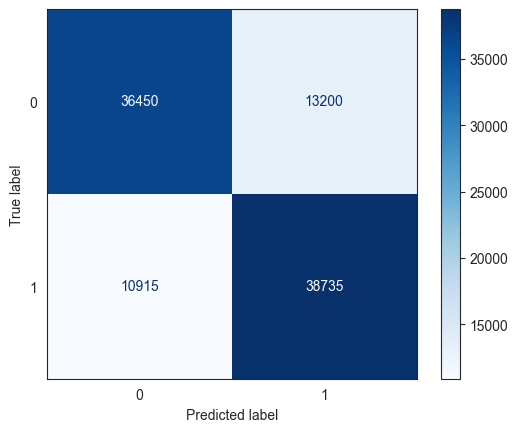

In [68]:
# Initialize a logistic regression model
log_reg = LogisticRegression(C = 0.1, max_iter=1000, random_state=42)

log_reg.fit(X_train, y_train)


y_pred = log_reg.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap=plt.cm.Blues)
plt.show()

the model can classify the to class but with very low accuarcy, precision and Recall , we need to make the recall of class 1 high, (model can predict the defualters with better way), so we can try models more complex

##### RandomForest

Accuracy: 0.9271198388721047
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     49650
           1       1.00      0.86      0.92     49650

    accuracy                           0.93     99300
   macro avg       0.94      0.93      0.93     99300
weighted avg       0.94      0.93      0.93     99300



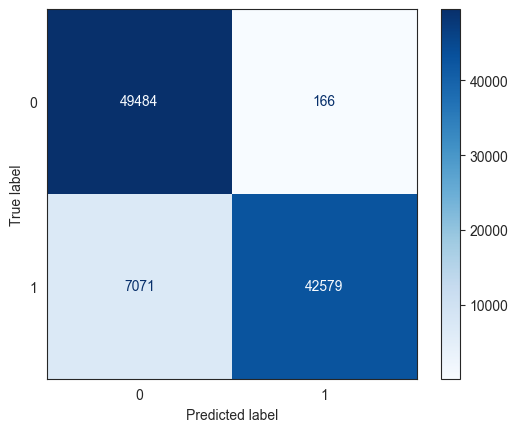

In [69]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

# Check model performance
print(f'Accuracy: {rfc.score(X_test, y_test)}')
y_pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, y_pred_rfc))
cm = confusion_matrix(y_test, y_pred_rfc)
ConfusionMatrixDisplay(cm).plot(cmap=plt.cm.Blues)
plt.show()

In [70]:
y_pred_rfc_train = rfc.predict(X_train)
print(classification_report(y_train, y_pred_rfc_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    115850
           1       1.00      1.00      1.00    115850

    accuracy                           1.00    231700
   macro avg       1.00      1.00      1.00    231700
weighted avg       1.00      1.00      1.00    231700



The Model Scores high recall - 90% for class 1 which is so good

##### XGBoost with low model complexity

In [71]:
xgb_model = XGBClassifier(subsample = 0.6,
                           reg_lambda = 0.01,
                           reg_alpha = 0.01,
                           n_estimators = 300,
                           max_depth =  7,
                           learning_rate = 0.2,
                           gamma = 0 ,
                           colsample_bytree = 0.6,
                           eval_metric='logloss',
                           use_label_encoder=False)
xgb_model.fit(X_train, y_train)


y_pred = xgb_model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93     49650
           1       0.98      0.88      0.93     49650

    accuracy                           0.93     99300
   macro avg       0.93      0.93      0.93     99300
weighted avg       0.93      0.93      0.93     99300



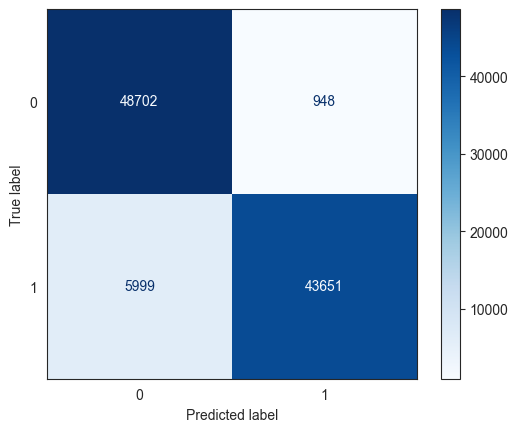

In [72]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap=plt.cm.Blues)
plt.show()

##### XGBoost with high model complexity

              precision    recall  f1-score   support

           0       0.89      0.97      0.93     49650
           1       0.97      0.88      0.92     49650

    accuracy                           0.93     99300
   macro avg       0.93      0.93      0.93     99300
weighted avg       0.93      0.93      0.93     99300



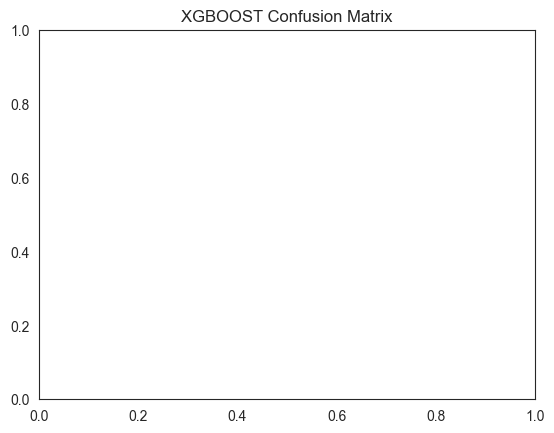

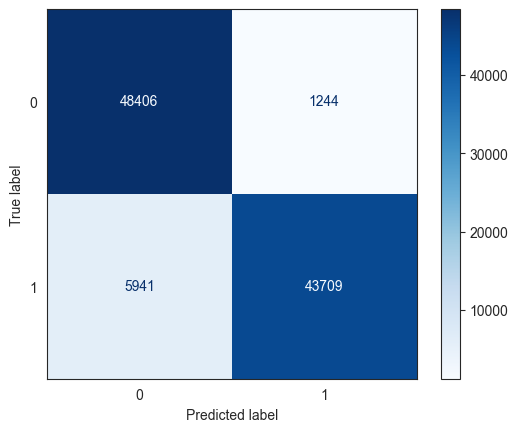

In [73]:
xgb_model = XGBClassifier(subsample = 0.6, reg_lambda = 0.01,
                          reg_alpha = 0.01, n_estimators = 800,
                          max_depth =  8, learning_rate = 0.2, gamma = 0 ,
                          colsample_bytree = 0.6, eval_metric='logloss',
                          use_label_encoder=False)

xgb_model.fit(X_train, y_train)


y_pred = xgb_model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.title('XGBOOST Confusion Matrix')
ConfusionMatrixDisplay(cm).plot(cmap=plt.cm.Blues)
plt.show()

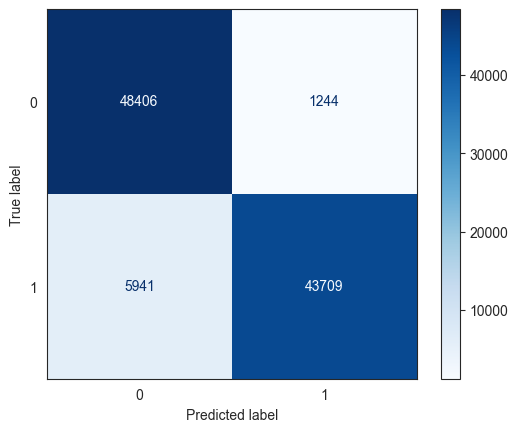

In [74]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap=plt.cm.Blues)
plt.show()

In [75]:
y_train_pred = xgb_model.predict(X_train)

# Print classification report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    115850
           1       1.00      1.00      1.00    115850

    accuracy                           1.00    231700
   macro avg       1.00      1.00      1.00    231700
weighted avg       1.00      1.00      1.00    231700



## Business KPIs

### 1. Loan Approval Rate:
A high loan approval rate indicates that the lending institution (ex: Bank) is identifying creditworthy borrowers, leading to increased customer satisfaction leading to an increase in revenue.


### 2. Default Rate:
A low default rate indicates that the lending institution does risk assessment. This helps minimize financial loss.


### 3. Average Loan Amount:
This KPI reflects the average loan size offered by the lending institution. Monitoring this metric helps identify market demand. And then according to demand we can start enabling the institution to adjust loan offerings and attract a wider range of customers.


### 4. Time to Process Loan Applications:
It measures the time taken to process loan applications from submission to approval. A shorter processing time is better to improve the customer satisfaction, improves operational efficiency, reduces costs, and allows the institution to handle a larger volume of loan applications.

### 5. Customer Satisfaction:
High customer satisfaction levels contribute to customer loyalty and positive brand perception. Satisfied customers are more likely to recommend the lending institution to others by word of mouth, leading to growth through referrals. Additionally, Improving the institution's reputation in the market.

### 6. Customer Lifetime Value (CLV):
CLV measures the total value a customer brings to the lending institution over their entire relationship (bank subscribtion for example) It takes factors such as loan repayments to track how discipline is the customer in repaying. And so the lending institution can identify high-value customers and focus on customer retention strategies, and coming up with personalized offers to keep good customers and maximize long-term profitability for the institute.